In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


In [3]:
df = pd.read_csv("CarPrice_Assignment_train_unclean.csv")
df_test = pd.read_csv("CarPrice_Assignment_test.csv")

In [4]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,...,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,...,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,176.2,...,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         153 non-null    int64  
 1   CarName           153 non-null    object 
 2   fueltype          150 non-null    object 
 3   aspiration        151 non-null    object 
 4   doornumber        152 non-null    object 
 5   carbody           153 non-null    object 
 6   drivewheel        153 non-null    object 
 7   enginelocation    142 non-null    object 
 8   wheelbase         151 non-null    float64
 9   carlength         150 non-null    float64
 10  carwidth          149 non-null    float64
 11  carheight         151 non-null    float64
 12  curbweight        152 non-null    float64
 13  enginetype        153 non-null    object 
 14  cylindernumber    152 non-null    object 
 15  enginesize        153 non-null    int64  
 16  fuelsystem        153 non-null    object 
 1

In [6]:
df_test.info()    ## no null values in test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         52 non-null     int64  
 1   CarName           52 non-null     object 
 2   fueltype          52 non-null     object 
 3   aspiration        52 non-null     object 
 4   doornumber        52 non-null     object 
 5   carbody           52 non-null     object 
 6   drivewheel        52 non-null     object 
 7   enginelocation    52 non-null     object 
 8   wheelbase         52 non-null     float64
 9   carlength         52 non-null     float64
 10  carwidth          52 non-null     float64
 11  carheight         52 non-null     float64
 12  curbweight        52 non-null     int64  
 13  enginetype        52 non-null     object 
 14  cylindernumber    52 non-null     object 
 15  enginesize        52 non-null     int64  
 16  fuelsystem        52 non-null     object 
 17 

In [7]:
pd.set_option('display.max_columns', 30)
df.describe(include='all')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,153.000000,153,150,151,152,153,153,142,151.000000,150.000000,149.000000,151.000000,152.000000,153,152,153.000000,153,151.000000,150.000000,151.000000,153.000000,146.000000,150.000000,150.000000,153.000000
unique,NaN,122,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,6,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,133,124,87,72,91,139,NaN,NaN,NaN,NaN,NaN,111,119,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.790850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.970199,174.342667,65.997987,53.774172,2574.019737,NaN,NaN,127.647059,NaN,3.342185,3.267167,10.217351,102.888889,5096.232877,25.360000,30.960000,13364.157954
std,1.259979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.384991,12.971747,2.077826,2.493791,541.390991,NaN,NaN,42.015265,NaN,0.266828,0.310188,4.110621,37.950895,456.186804,6.794471,7.259227,8302.558158
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,48.800000,1488.000000,NaN,NaN,61.000000,NaN,2.910000,2.190000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.925000,64.200000,52.000000,2143.750000,NaN,NaN,97.000000,NaN,3.140000,3.127500,8.500000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.600000,54.100000,2434.000000,NaN,NaN,120.000000,NaN,3.350000,3.290000,9.000000,95.000000,5100.000000,25.000000,31.000000,10698.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.800000,184.600000,67.200000,55.700000,3036.000000,NaN,NaN,145.000000,NaN,3.595000,3.410000,9.405000,116.000000,5400.000000,30.000000,36.000000,16500.000000


In [8]:
df_test.describe(include='all')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,52.000000,52,52,52,52,52,52,52,52.000000,52.000000,52.000000,52.000000,52.000000,52,52,52.000000,52,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,0.0
unique,NaN,48,2,2,2,5,3,1,NaN,NaN,NaN,NaN,NaN,6,6,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,subaru dl,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,49,42,27,24,29,52,NaN,NaN,NaN,NaN,NaN,37,39,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.961538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.982692,173.055769,65.646154,53.428846,2504.711538,NaN,NaN,124.730769,NaN,3.287885,3.220481,9.692308,107.730769,5221.153846,24.442308,30.288462,NaN
std,1.203940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.865756,10.559828,2.332672,2.199228,460.929297,NaN,NaN,40.850332,NaN,0.282859,0.326350,3.152021,44.097092,538.365915,5.337303,5.675322,NaN
min,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.600000,157.300000,61.800000,47.800000,1876.000000,NaN,NaN,70.000000,NaN,2.540000,2.070000,7.000000,62.000000,4200.000000,13.000000,17.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,165.675000,63.950000,52.000000,2202.000000,NaN,NaN,97.750000,NaN,3.150000,3.077500,8.700000,75.250000,4800.000000,19.750000,26.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.500000,172.800000,65.300000,54.000000,2408.500000,NaN,NaN,110.000000,NaN,3.215000,3.272500,9.000000,101.500000,5200.000000,24.000000,29.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.650000,176.800000,66.500000,54.900000,2775.750000,NaN,NaN,140.250000,NaN,3.550000,3.402500,9.400000,120.250000,5500.000000,27.000000,33.250000,NaN


In [9]:
df.shape

(153, 25)

In [10]:
df_test.shape

(52, 25)

## Data Cleaning

In [11]:
df.isnull().sum()

symboling            0
CarName              0
fueltype             3
aspiration           2
doornumber           1
carbody              0
drivewheel           0
enginelocation      11
wheelbase            2
carlength            3
carwidth             4
carheight            2
curbweight           1
enginetype           0
cylindernumber       1
enginesize           0
fuelsystem           0
boreratio            2
stroke               3
compressionratio     2
horsepower           0
peakrpm              7
citympg              3
highwaympg           3
price                0
dtype: int64

In [12]:
df_test.isnull().sum()  ##price columns is empty which has to be predicted

symboling            0
CarName              0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           0
fuelsystem           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price               52
dtype: int64

In [13]:
##carname has company name and car model separated by space.Car company could be a categorical variable of significance in prediction of price
df['CarName']= df.CarName.astype('category')
df_test['CarName'] = df.CarName.astype('category')

In [14]:
df['CarName'].dtype

CategoricalDtype(categories=['Nissan versa', 'alfa-romero stelvio', 'audi 100 ls',
                  'audi 4000', 'audi 5000', 'audi 5000s (diesel)', 'audi fox',
                  'bmw 320i', 'bmw x3', 'bmw x4',
                  ...
                  'volkswagen model 111', 'volkswagen rabbit custom',
                  'volkswagen type 3', 'volvo 144ea', 'volvo 145e (sw)',
                  'volvo 244dl', 'volvo 245', 'volvo 246', 'volvo 264gl',
                  'volvo diesel'],
                 ordered=False)

In [15]:
df['CarCompany']=df.CarName.str.split(" ")
df_test['CarCompany']=df_test.CarName.str.split(" ")

In [16]:
df['CarCompany'].dtype

dtype('O')

In [17]:
df_test['CarCompany'].dtype

dtype('O')

In [18]:
df['CarCompany']=pd.Series(map(lambda x:x[0],df.CarCompany))
df_test['CarCompany']=pd.Series(map(lambda x:x[0],df_test.CarCompany))

In [19]:
df['CarCompany'].unique()

array(['audi', 'peugeot', 'mitsubishi', 'toyota', 'subaru', 'porsche',
       'volvo', 'maxda', 'jaguar', 'mazda', 'bmw', 'volkswagen', 'nissan',
       'honda', 'alfa-romero', 'dodge', 'porcshce', 'vokswagen',
       'toyouta', 'buick', 'chevrolet', 'plymouth', 'mercury', 'saab',
       'renault', 'isuzu', 'Nissan'], dtype=object)

In [20]:
### Carcompany has some misspelt names that need correction - Vokswagen is Volkswagen,
### nissan and Nissan are same, maxda and mazda are same, toyouta should be toyota
df['CarCompany'].replace('toyouta','toyota',inplace=True)
df['CarCompany'].replace('maxda','mazda',inplace=True)
df['CarCompany'].replace('nissan','Nissan',inplace=True)
df['CarCompany'].replace('vokswagen','volkswagen',inplace=True)
df['CarCompany'].replace('porcshce','porsche',inplace=True)

In [21]:
df['CarCompany'].value_counts()

toyota         23
mazda          15
Nissan         13
peugeot        11
mitsubishi     10
volvo           9
honda           9
subaru          8
volkswagen      7
dodge           7
buick           6
bmw             6
plymouth        5
audi            5
porsche         4
chevrolet       3
saab            3
isuzu           3
jaguar          2
renault         2
alfa-romero     1
mercury         1
Name: CarCompany, dtype: int64

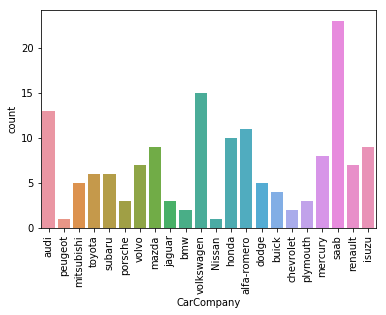

In [22]:
## carcompany should be a category instead of integer
df['CarCompany']=df['CarCompany'].astype('category')
sns.countplot(df.CarCompany).set_xticklabels(labels = df.CarCompany.unique(),rotation=90);
##Toyota is most frequent value of carcompany

In [23]:
df_test.CarCompany.unique()

array(['audi', 'peugeot', 'mitsubishi', 'toyota', 'subaru', 'porsche',
       'volvo', 'maxda', 'jaguar', 'mazda', 'bmw', 'volkswagen', 'nissan',
       'honda', 'alfa-romero', 'dodge', 'porcshce', 'vokswagen',
       'toyouta'], dtype=object)

In [24]:
### test data is also corrected to be in accordance with training data
df_test['CarCompany'].replace('toyouta','toyota',inplace=True)
df_test['CarCompany'].replace('maxda','mazda',inplace=True)
df_test['CarCompany'].replace('nissan','Nissan',inplace=True)
df_test['CarCompany'].replace('vokswagen','volkswagen',inplace=True)
df_test['CarCompany'].replace('porcshce','porsche',inplace=True)

In [25]:
##there are relatively less number of categories in test data compared to that of train. So encodig should be done to address this difference
df_test['CarCompany'].value_counts()

toyota         7
peugeot        6
mitsubishi     5
bmw            4
mazda          4
volvo          4
porsche        3
volkswagen     3
subaru         3
honda          3
Nissan         3
audi           3
dodge          2
jaguar         1
alfa-romero    1
Name: CarCompany, dtype: int64

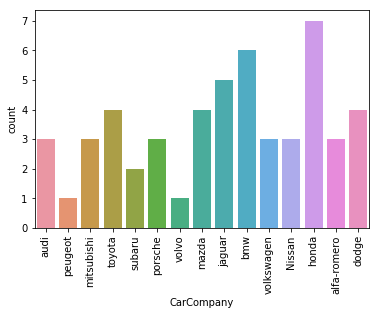

In [26]:
## carcompany should be a category instead of integer
df_test['CarCompany']=df_test['CarCompany'].astype('category')
sns.countplot(df_test.CarCompany).set_xticklabels(labels = df_test.CarCompany.unique(),rotation=90);
##honda has highest count in test data

In [27]:
df.drop('CarName',axis=1,inplace=True)
df_test.drop('CarName',axis=1,inplace=True)

In [28]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0,audi
1,0,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285.0,l,four,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0,peugeot
2,3,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833.0,ohc,four,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0,mitsubishi
3,1,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040.0,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0,toyota
4,2,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975.0,ohc,four,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0,toyota


In [29]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,2,gas,turbo,four,sedan,fwd,front,99.1,186.6,66.5,56.1,2847,dohc,four,121,mpfi,3.54,3.07,9.0,160,5500,19,26,NaN,audi
1,3,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28,NaN,peugeot
2,2,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.64,8.7,73,4400,26,31,NaN,mitsubishi
3,1,gas,std,two,hatchback,fwd,front,94.5,165.6,63.8,53.3,2028,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,NaN,toyota
4,1,gas,std,two,sedan,rwd,front,94.5,168.7,64.0,52.6,2265,dohc,four,98,mpfi,3.24,3.08,9.4,112,6600,26,29,NaN,toyota


## Missing values treatment

In [30]:
## fuel_mode, aspiration, doornumber etc are categorical variables that can be replaced by mode 
## other continuous variables like carlength or car width can be replaced with mean/median

In [31]:
fuel_mode = df['fueltype'].mode()
fuel_mode

0    gas
dtype: object

In [32]:
df['fueltype'] = df['fueltype'].astype('category')
#df['fueltype']=df['fueltype'].replace(np.nan,df['fueltype'].mode())

In [33]:
df.fueltype.value_counts()

gas       133
diesel     17
Name: fueltype, dtype: int64

In [34]:
df.groupby(['carbody','fueltype']).size().unstack()

fueltype,diesel,gas
carbody,,
convertible,0,4
hardtop,0,5
hatchback,1,48
sedan,13,58
wagon,3,18


In [35]:
df['fueltype'] = df['fueltype'].fillna(fuel_mode[0])

In [36]:
df_test['fueltype'] = df_test['fueltype'].astype('category')
df_test.fueltype.value_counts()

gas       49
diesel     3
Name: fueltype, dtype: int64

In [37]:
df['aspiration']=df['aspiration'].astype('category')
df['aspiration'].value_counts()

std      124
turbo     27
Name: aspiration, dtype: int64

In [38]:
df.groupby(['carbody','aspiration']).size().unstack()

aspiration,std,turbo
carbody,,
convertible,4,0
hardtop,5,0
hatchback,41,10
sedan,58,12
wagon,16,5


In [39]:
df['aspiration']=df['aspiration'].fillna(df['aspiration'].mode()[0])

In [40]:
df_test['aspiration']=df_test['aspiration'].astype('category')
df_test['aspiration'].value_counts()

std      42
turbo    10
Name: aspiration, dtype: int64

In [41]:
df.doornumber.value_counts()

four    87
two     65
Name: doornumber, dtype: int64

In [42]:
df_test.doornumber.value_counts()

four    27
two     25
Name: doornumber, dtype: int64

In [43]:
df['doornumber']=df['doornumber'].astype('category')
df_test['doornumber']=df_test['doornumber'].astype('category')
df.groupby(['carbody','doornumber']).size().unstack()

doornumber,four,two
carbody,,
convertible,0,4
hardtop,0,5
hatchback,7,44
sedan,60,12
wagon,20,0


In [44]:
df_test.groupby(['carbody','doornumber']).size().unstack()

doornumber,four,two
carbody,,
convertible,0,2
hardtop,0,3
hatchback,3,16
sedan,20,4
wagon,4,0


In [45]:
##convertible,hardtop and hatchback cars are mostly two doored.. replacing doornumber accordingly
if (((df['carbody'] == 'convertible') | (df['carbody'] == 'hardtop') | (df['carbody'] == 'hatchback')).any()):
    df['doornumber'].fillna('two',inplace=True)
else:
    df['doornumber'].fillna('four',inplace=True)

In [46]:
df.doornumber.value_counts()

four    87
two     66
Name: doornumber, dtype: int64

In [47]:
df_test.doornumber.value_counts()

four    27
two     25
Name: doornumber, dtype: int64

In [48]:
df.enginelocation = df.enginelocation.astype('category')
df_test.enginelocation = df_test.enginelocation.astype('category')

In [49]:
df.enginelocation.value_counts()

front    139
rear       3
Name: enginelocation, dtype: int64

In [50]:
df_test.enginelocation.value_counts()

front    52
Name: enginelocation, dtype: int64

In [51]:
df.groupby(['CarCompany','enginelocation']).size().unstack()  ##most of porsche cars have rear engine. we can replace rear for missing engine location for porsche cars

enginelocation,front,rear
CarCompany,,
Nissan,11,0
alfa-romero,1,0
audi,5,0
bmw,4,0
buick,6,0
chevrolet,3,0
dodge,7,0
honda,8,0
isuzu,2,0


In [52]:
df_test.groupby(['CarCompany','enginelocation']).size().unstack() ##But porsche cars in test data have front engine only

enginelocation,front
CarCompany,
Nissan,3
alfa-romero,1
audi,3
bmw,4
dodge,2
honda,3
jaguar,1
mazda,4
mitsubishi,5


In [53]:
##we can replace with mode as there is no specific pattern
df['enginelocation']=df['enginelocation'].fillna(df['enginelocation'].mode()[0])

In [54]:
df.groupby(['carbody'])['wheelbase'].mean()

carbody
convertible     93.275000
hardtop         97.560000
hatchback       95.254902
sedan          100.881429
wagon          103.042857
Name: wheelbase, dtype: float64

In [55]:
df_test.groupby(['carbody'])['wheelbase'].mean()

carbody
convertible     91.550000
hardtop        100.066667
hatchback       96.289474
sedan           99.679167
wagon           97.500000
Name: wheelbase, dtype: float64

In [56]:
df_test.groupby(['CarCompany'])['wheelbase'].mean()

CarCompany
Nissan          95.233333
alfa-romero     94.300000
audi           100.500000
bmw             99.175000
dodge           99.450000
honda           94.133333
jaguar          93.700000
mazda           95.625000
mitsubishi      97.760000
peugeot         97.550000
porsche        104.066667
subaru          97.533333
toyota          96.385714
volkswagen     103.833333
volvo           98.575000
Name: wheelbase, dtype: float64

In [57]:
df.groupby(['CarCompany'])['wheelbase'].mean()

CarCompany
Nissan          95.938462
alfa-romero     88.600000
audi           102.140000
bmw            104.340000
buick          110.850000
chevrolet       92.466667
dodge           95.385714
honda           93.366667
isuzu           95.000000
jaguar         113.000000
mazda           96.606667
mercury        102.700000
mitsubishi      95.660000
peugeot        110.200000
plymouth        95.620000
porsche         90.750000
renault         96.100000
saab            99.100000
subaru          96.187500
toyota          98.308696
volkswagen      97.742857
volvo          106.100000
Name: wheelbase, dtype: float64

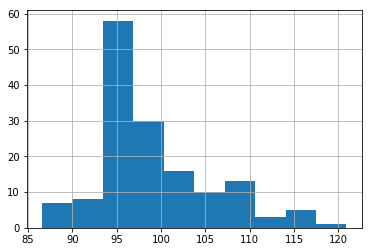

In [58]:
###from info command we can infer that nan values can be replaced with mean as there are no highly extreme values and 
## mean,median are almost equal for wheelbase,carlength,carheight,carwidth, 
## also no particular pattern based on carbody or carcompany seen among train and test data
df['wheelbase'].hist()
df['wheelbase'] = df['wheelbase'].fillna(df['wheelbase'].mean(skipna=True))

In [59]:
df.groupby(['carbody'])['carlength'].mean()

carbody
convertible    173.550000
hardtop        177.880000
hatchback      165.698039
sedan          178.036232
wagon          182.509524
Name: carlength, dtype: float64

In [60]:
df_test.groupby(['carbody'])['carlength'].mean()

carbody
convertible    164.050000
hardtop        175.366667
hatchback      168.994737
sedan          176.412500
wagon          174.975000
Name: carlength, dtype: float64

In [61]:
df.groupby(['CarCompany'])['carlength'].mean()

CarCompany
Nissan         172.753846
alfa-romero    168.800000
audi           183.500000
bmw            189.120000
buick          195.333333
chevrolet      151.933333
dodge          162.042857
honda          156.477778
isuzu          161.466667
jaguar         199.600000
mazda          170.646667
mercury        178.400000
mitsubishi     169.740000
peugeot        191.580000
plymouth       164.760000
porsche        168.900000
renault        179.150000
saab           186.600000
subaru         168.662500
toyota         172.363636
volkswagen     172.914286
volvo          188.800000
Name: carlength, dtype: float64

In [62]:
df_test.groupby(['CarCompany'])['carlength'].mean()

CarCompany
Nissan         162.800000
alfa-romero    170.700000
audi           187.133333
bmw            173.400000
dodge          169.500000
honda          161.433333
jaguar         157.300000
mazda          168.725000
mitsubishi     169.240000
peugeot        175.900000
porsche        184.400000
subaru         171.900000
toyota         172.257143
volkswagen     184.866667
volvo          174.600000
Name: carlength, dtype: float64

In [63]:
df.groupby(['CarCompany'])['carheight'].mean()

CarCompany
Nissan         53.469231
alfa-romero    48.800000
audi           54.200000
bmw            55.000000
buick          55.766667
chevrolet      52.400000
dodge          51.914286
honda          52.900000
isuzu          51.800000
jaguar         52.800000
mazda          53.540000
mercury        54.800000
mitsubishi     50.580000
peugeot        57.066667
plymouth       52.600000
porsche        51.250000
renault        52.850000
saab           56.100000
subaru         53.637500
toyota         53.800000
volkswagen     55.614286
volvo          56.400000
Name: carheight, dtype: float64

In [64]:
df_test.groupby(['CarCompany'])['carheight'].mean()

CarCompany
Nissan         52.233333
alfa-romero    53.500000
audi           53.000000
bmw            53.375000
dodge          54.200000
honda          53.566667
jaguar         50.800000
mazda          50.975000
mitsubishi     53.860000
peugeot        53.183333
porsche        55.633333
subaru         54.566667
toyota         53.042857
volkswagen     54.900000
volvo          54.200000
Name: carheight, dtype: float64

In [65]:
df.groupby(['carbody'])['carheight'].mean()

carbody
convertible    51.050000
hardtop        52.520000
hatchback      52.019608
sedan          54.404225
wagon          56.870000
Name: carheight, dtype: float64

In [66]:
df_test.groupby(['carbody'])['carheight'].mean()

carbody
convertible    52.200000
hardtop        53.400000
hatchback      52.347368
sedan          54.041667
wagon          55.525000
Name: carheight, dtype: float64

In [67]:
## No specific mean value observed based on carbody or company..so we take mean value to impute null values

df['carlength']=df['carlength'].fillna(df['carlength'].mean(skipna=True))
df['carwidth']=df['carwidth'].fillna(df['carwidth'].mean(skipna=True))
df['carheight']=df['carheight'].fillna(df['carheight'].mean(skipna=True))
df['curbweight']=df['curbweight'].fillna(df['curbweight'].mean(skipna=True))

In [68]:
df['boreratio']=df['boreratio'].fillna(df['boreratio'].mean(skipna=True))
df['stroke']=df['stroke'].fillna(df['stroke'].mean(skipna=True))
df['compressionratio']=df['compressionratio'].fillna(df['compressionratio'].mean(skipna=True))
df['peakrpm']=df['peakrpm'].fillna(df['peakrpm'].mean(skipna=True))
df['citympg']=df['citympg'].fillna(df['citympg'].mean(skipna=True))
df['highwaympg']=df['highwaympg'].fillna(df['highwaympg'].mean(skipna=True))

In [69]:
df['cylindernumber']=df['cylindernumber'].astype('category')
df_test['cylindernumber']=df_test['cylindernumber'].astype('category')

In [70]:
df['cylindernumber'].value_counts()

four     119
six       19
five       6
eight      4
two        3
three      1
Name: cylindernumber, dtype: int64

In [71]:
df_test['cylindernumber'].value_counts()

four      39
six        5
five       5
two        1
twelve     1
eight      1
Name: cylindernumber, dtype: int64

In [72]:
df.groupby(['carbody','cylindernumber']).size().unstack()

cylindernumber,eight,five,four,six,three,two
carbody,,,,,,
convertible,1,0,2,1,0,0
hardtop,1,0,2,2,0,0
hatchback,0,1,42,4,1,3
sedan,2,3,56,10,0,0
wagon,0,2,17,2,0,0


In [73]:
df_test.groupby(['carbody','cylindernumber']).size().unstack()

cylindernumber,eight,five,four,six,twelve,two
carbody,,,,,,
convertible,0,0,2,0,0,0
hardtop,0,1,2,0,0,0
hatchback,1,0,15,2,0,1
sedan,0,4,16,3,1,0
wagon,0,0,4,0,0,0


In [74]:
df['cylindernumber']=df['cylindernumber'].fillna(df['cylindernumber'].mode()[0])

In [75]:
df['enginetype']=df['enginetype'].astype('category')
df_test['enginetype']=df_test['enginetype'].astype('category')
df['carbody']=df['carbody'].astype('category')
df_test['carbody']=df_test['carbody'].astype('category')
df['drivewheel']=df['drivewheel'].astype('category')
df_test['drivewheel']=df_test['drivewheel'].astype('category')
df['fuelsystem']=df['fuelsystem'].astype('category')
df_test['fuelsystem']=df_test['fuelsystem'].astype('category')

## Exploratory Data Analysis 

### Univariate Analysis

In [76]:
df.dtypes

symboling              int64
fueltype            category
aspiration          category
doornumber          category
carbody             category
drivewheel          category
enginelocation      category
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight           float64
enginetype          category
cylindernumber      category
enginesize             int64
fuelsystem          category
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm              float64
citympg              float64
highwaympg           float64
price                float64
CarCompany          category
dtype: object

In [77]:
df_test.dtypes

symboling              int64
fueltype            category
aspiration          category
doornumber          category
carbody             category
drivewheel          category
enginelocation      category
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype          category
cylindernumber      category
enginesize             int64
fuelsystem          category
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
CarCompany          category
dtype: object

In [78]:
df.symboling.unique()

array([ 2,  0,  3,  1, -1, -2], dtype=int64)

In [79]:
df.symboling.value_counts()

 0    49
 1    40
 2    24
 3    19
-1    18
-2     3
Name: symboling, dtype: int64

In [80]:
df_test.symboling.value_counts()

 0    18
 1    14
 3     8
 2     8
-1     4
Name: symboling, dtype: int64

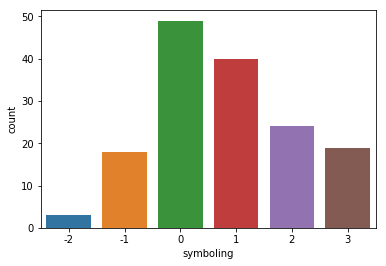

In [81]:
sns.countplot(df.symboling)
##symboling is mostly categorical data with 6 categories..It may be converted from int to category
df['symboling']=df['symboling'].astype('category')

In [82]:
df['fueltype'].value_counts()

gas       136
diesel     17
Name: fueltype, dtype: int64

In [83]:
df_test.fueltype.value_counts()

gas       49
diesel     3
Name: fueltype, dtype: int64

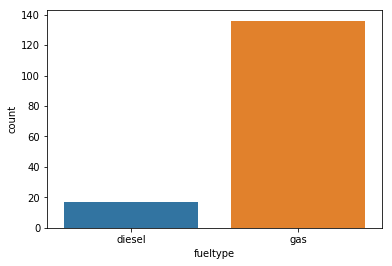

In [84]:
sns.countplot(df.fueltype)
##gas is the most frequent fuel type

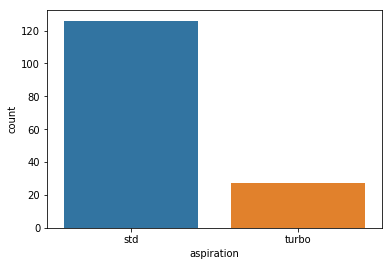

In [85]:
sns.countplot(df.aspiration)
## std is the most freq aspiration

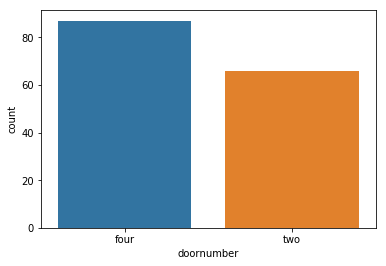

In [86]:
sns.countplot(df.doornumber)
##most of the cars are 4 doored

In [87]:
df.carbody.value_counts()

sedan          72
hatchback      51
wagon          21
hardtop         5
convertible     4
Name: carbody, dtype: int64

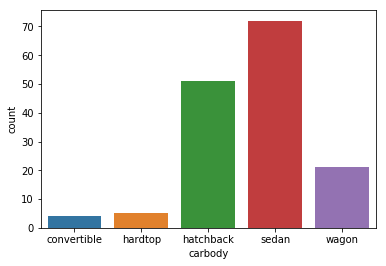

In [88]:
sns.countplot(df.carbody)  ## most of the car bodies are sedan type

In [89]:
df.drivewheel.value_counts()

fwd    91
rwd    57
4wd     5
Name: drivewheel, dtype: int64

In [90]:
df_test.drivewheel.value_counts()

fwd    29
rwd    19
4wd     4
Name: drivewheel, dtype: int64

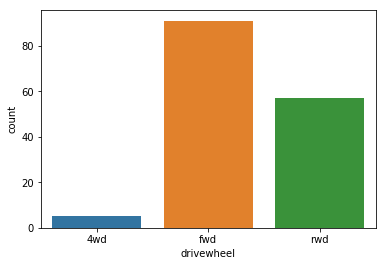

In [91]:
sns.countplot(df.drivewheel) ## most of the cars are fwd drive wheel

In [92]:
df.enginelocation.value_counts()

front    150
rear       3
Name: enginelocation, dtype: int64

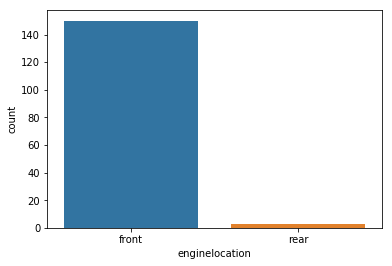

In [93]:
sns.countplot(df.enginelocation)  ##most of the cars are front engines

In [94]:
df.enginetype.value_counts()

ohc      111
l         12
ohcf      11
ohcv      10
dohc       6
rotor      3
Name: enginetype, dtype: int64

In [95]:
df_test.enginetype.value_counts()

ohc      37
dohc      6
ohcf      4
ohcv      3
rotor     1
dohcv     1
Name: enginetype, dtype: int64

In [96]:
##There is a dohcv engine tupe in test data set hwich could be a typo error..replace it with dohc
df_test.enginetype.replace('dohcv','dohc',inplace=True)

In [97]:
df_test.enginetype.value_counts()

ohc      37
dohc      7
ohcf      4
ohcv      3
rotor     1
Name: enginetype, dtype: int64

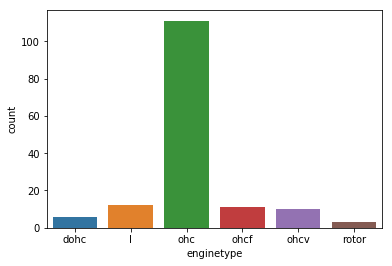

In [98]:
sns.countplot(df.enginetype)  ##most cars are of ohc engine types

In [99]:
df.cylindernumber.value_counts()

four     120
six       19
five       6
eight      4
two        3
three      1
Name: cylindernumber, dtype: int64

In [100]:
df_test.cylindernumber.value_counts()

four      39
six        5
five       5
two        1
twelve     1
eight      1
Name: cylindernumber, dtype: int64

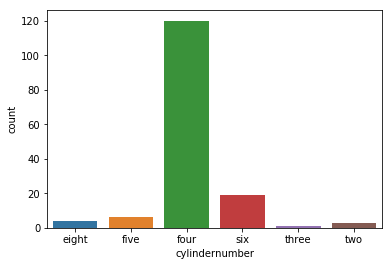

In [101]:
sns.countplot(df.cylindernumber) ##most cars are of 4 cylinders followed by 6 cylinders

In [102]:
df.fuelsystem.value_counts()

mpfi    68
2bbl    51
idi     17
1bbl     7
spdi     6
4bbl     2
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [103]:
df_test.fuelsystem.value_counts()

mpfi    26
2bbl    15
1bbl     4
spdi     3
idi      3
4bbl     1
Name: fuelsystem, dtype: int64

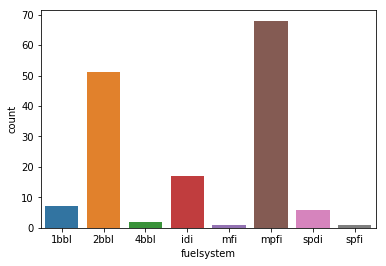

In [104]:
df.fuelsystem = df.fuelsystem.astype('category')
sns.countplot(df.fuelsystem)  ##most cars are mpfi followed by 2bbl fuel system types

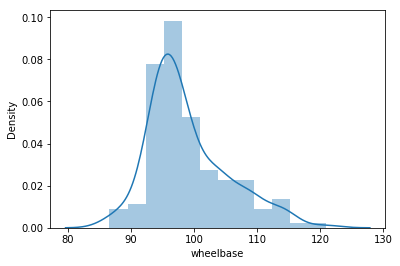

In [105]:
##continuous variables analysis 
sns.distplot(df.wheelbase)

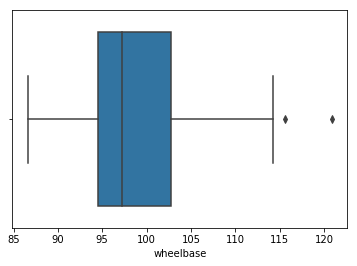

In [106]:
sns.boxplot(df.wheelbase) ##wheelbase has outliers 

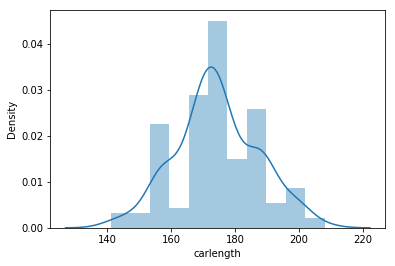

In [107]:
sns.distplot(df.carlength)

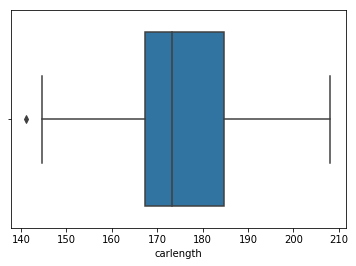

In [108]:
sns.boxplot(df.carlength) ## carlength has an outlier

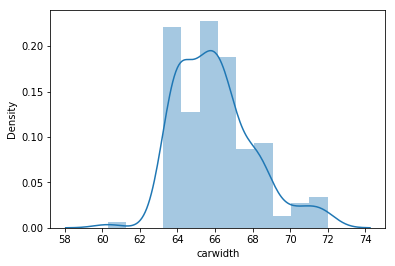

In [109]:
sns.distplot(df.carwidth)

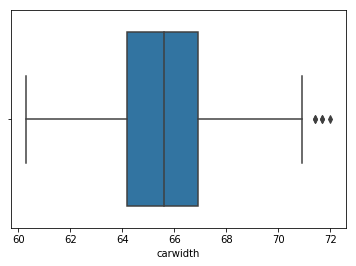

In [110]:
sns.boxplot(df.carwidth)  ##car width has outliers

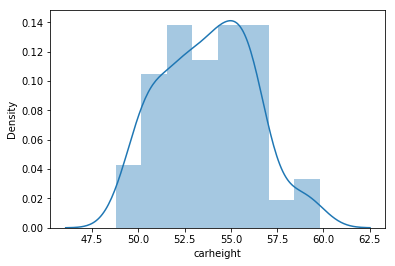

In [111]:
sns.distplot(df.carheight)

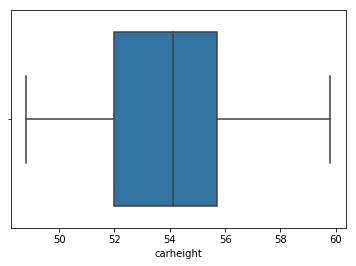

In [112]:
sns.boxplot(df.carheight)  ##carheight has no outliers

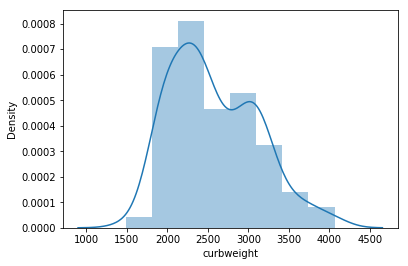

In [113]:
sns.distplot(df.curbweight)

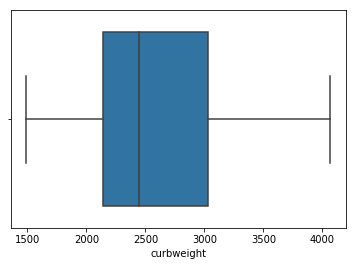

In [114]:
sns.boxplot(df.curbweight)

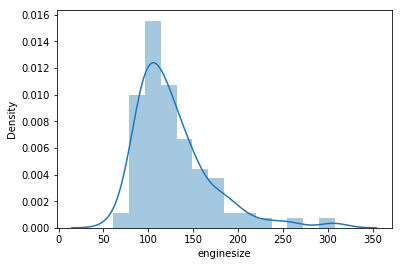

In [115]:
sns.distplot(df.enginesize)

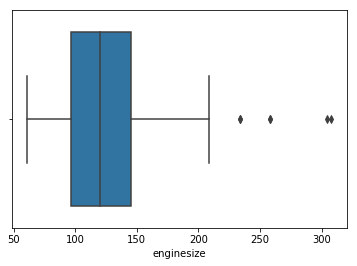

In [116]:
sns.boxplot(df.enginesize)  ##engine size has outliers

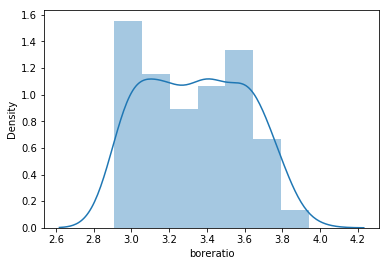

In [117]:
sns.distplot(df.boreratio)

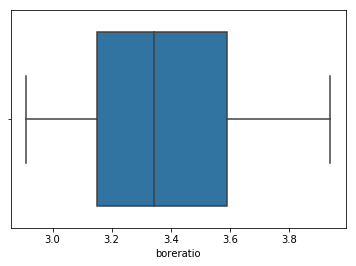

In [118]:
sns.boxplot(df.boreratio)

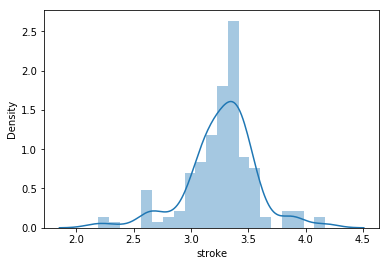

In [119]:
sns.distplot(df.stroke)

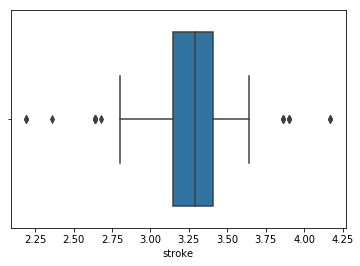

In [120]:
sns.boxplot(df.stroke)   ##stroke has outliers

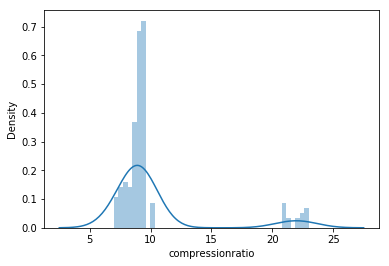

In [121]:
sns.distplot(df.compressionratio)

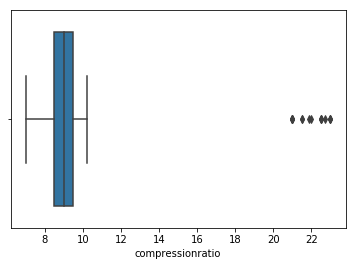

In [122]:
sns.boxplot(df.compressionratio)  ##compression ratio has outliers

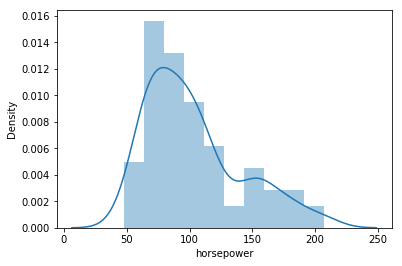

In [123]:
sns.distplot(df.horsepower)

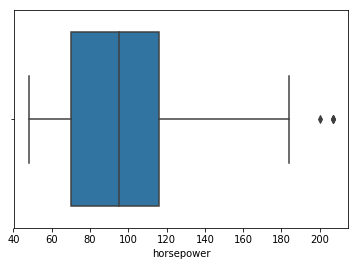

In [124]:
sns.boxplot(df.horsepower)  ## horsepower has outliers

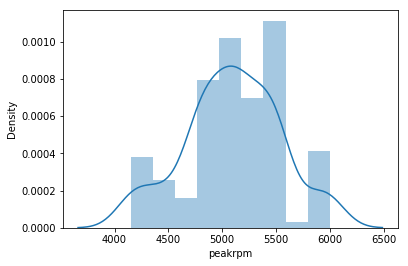

In [125]:
sns.distplot(df.peakrpm)

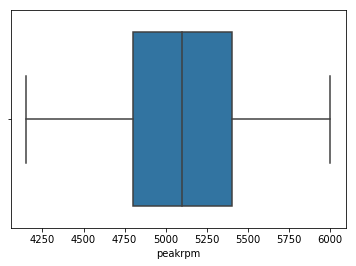

In [126]:
sns.boxplot(df.peakrpm)

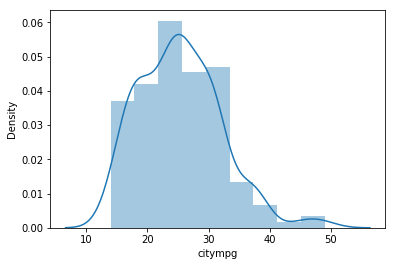

In [127]:
sns.distplot(df.citympg)

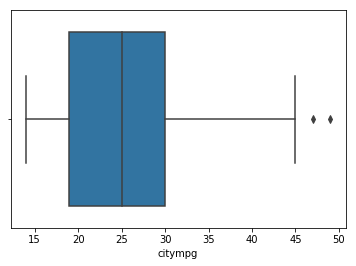

In [128]:
sns.boxplot(df.citympg)  ##outliers

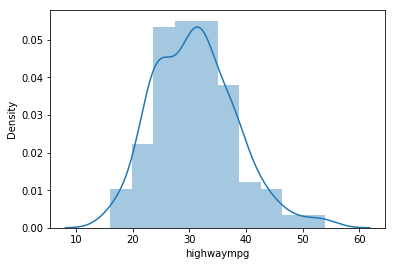

In [129]:
sns.distplot(df.highwaympg)

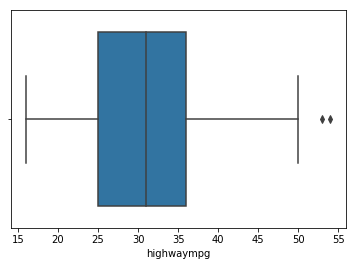

In [130]:
sns.boxplot(df.highwaympg)

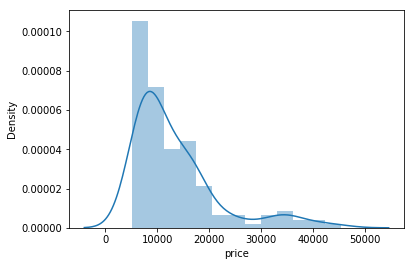

In [131]:
sns.distplot(df.price)

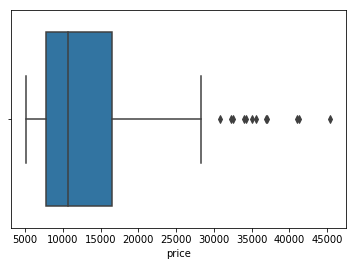

In [132]:
sns.boxplot(df.price)     ##price has many outliers

## Bivariate Analysis

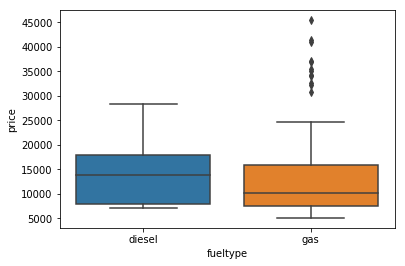

In [133]:
sns.boxplot(x=df['fueltype'],y=df['price'])   ## diesel vehicles are costlier

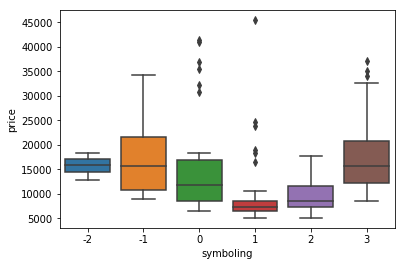

In [134]:
sns.boxplot(df['symboling'],df['price'])

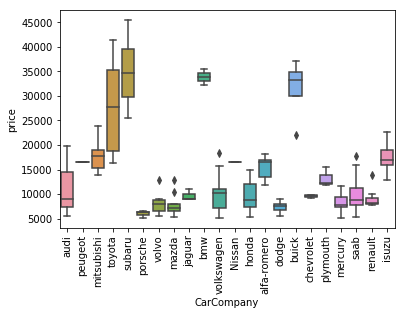

In [135]:
sns.boxplot(df['CarCompany'],df['price']).set_xticklabels(labels = df.CarCompany.unique(),rotation=90);

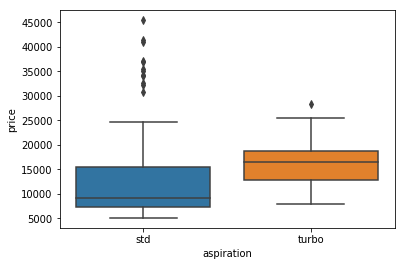

In [136]:
sns.boxplot(df['aspiration'],df['price'])   ##mean price is higher for turbo

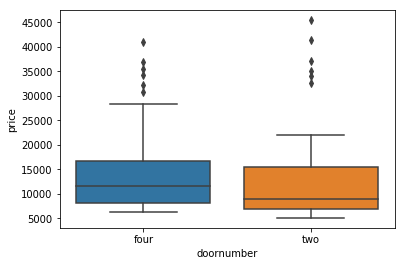

In [137]:
sns.boxplot(df['doornumber'],df['price'])

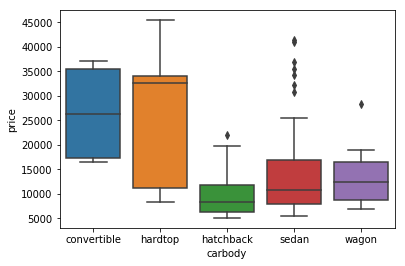

In [138]:
sns.boxplot(df['carbody'],df['price'])  ##convertible,hardtop are costlier vehicles

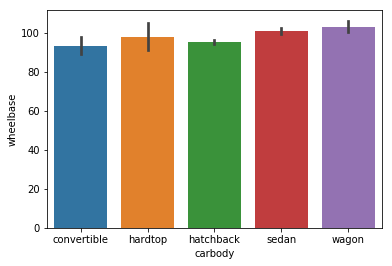

In [139]:
sns.barplot(df['carbody'],df['wheelbase'])

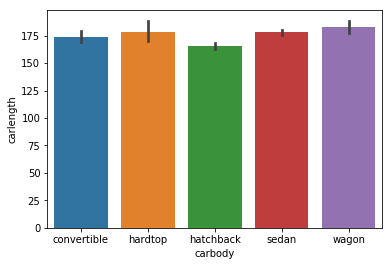

In [140]:
sns.barplot(df['carbody'],df['carlength'])

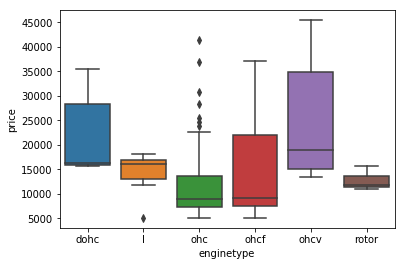

In [141]:
sns.boxplot(df['enginetype'],df['price'])    ##ohcv is more costlier

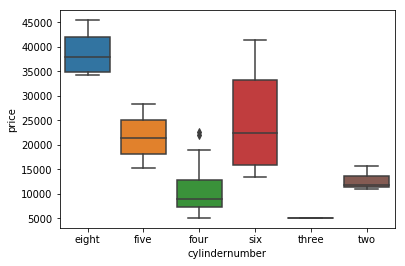

In [142]:
sns.boxplot(df['cylindernumber'],df['price'])  ##eight cylindered vehicles are costlier

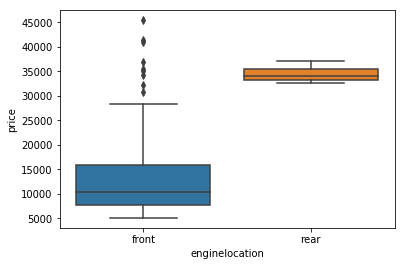

In [143]:
sns.boxplot(df['enginelocation'],df['price'])  ##mean price of rear engine vehicle is high

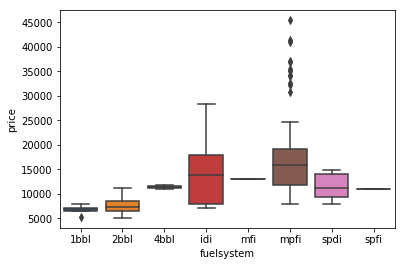

In [144]:
sns.boxplot(df['fuelsystem'],df['price'])

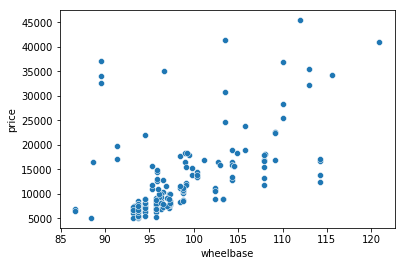

In [145]:
sns.scatterplot(df['wheelbase'],df['price'])   ##seems like there exists some linear relation between wheelbase and price except few outliers

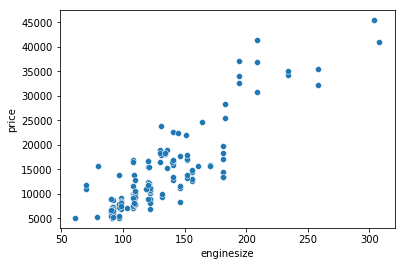

In [146]:
sns.scatterplot(df['enginesize'],df['price'])  ##engine size is highly related with price linearly

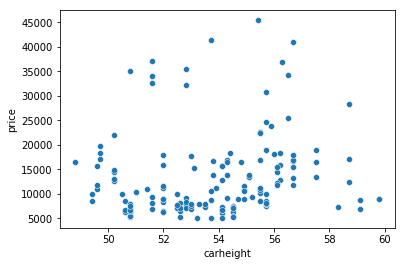

In [147]:
sns.scatterplot(df['carheight'],df['price'])   ##no visible relation

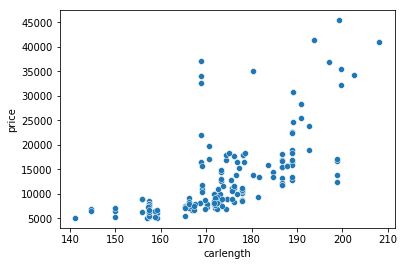

In [148]:
sns.scatterplot(df['carlength'],df['price'])   ###there is linear positive relation

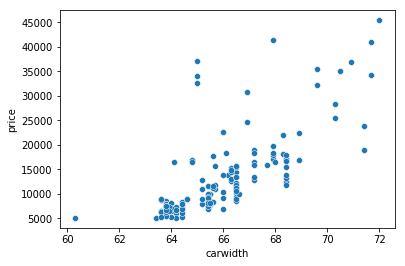

In [149]:
sns.scatterplot(df['carwidth'],df['price'])  ##there exists positive linear relation same like that of carlength which could be probably due to collinearity

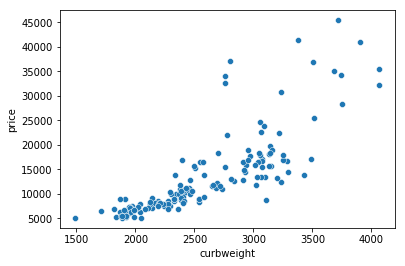

In [150]:
sns.scatterplot(df['curbweight'],df['price'])  ##highly linear positive relation

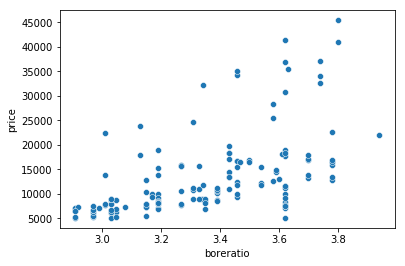

In [151]:
sns.scatterplot(df['boreratio'],df['price'])  ##partial relation

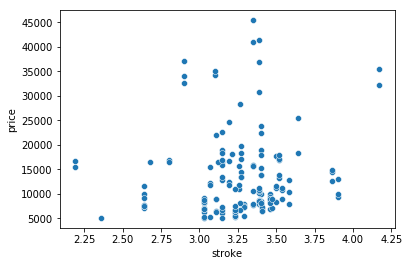

In [152]:
sns.scatterplot(df['stroke'],df['price'])   ##not related

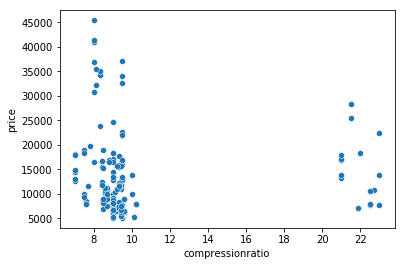

In [153]:
sns.scatterplot(df['compressionratio'],df['price'])  ##not related much and there are outliers

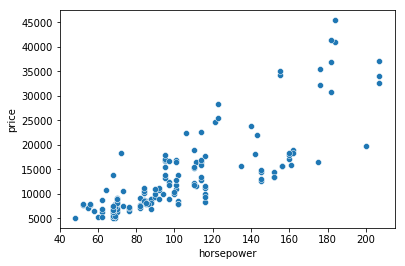

In [154]:
sns.scatterplot(df['horsepower'],df['price'])  ##highly positively linear relation

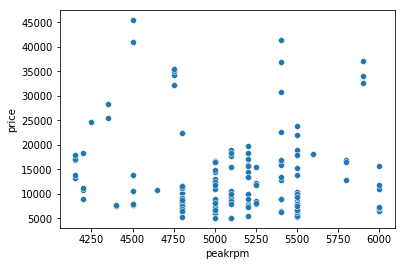

In [155]:
sns.scatterplot(df['peakrpm'],df['price'])   ##no visible relation

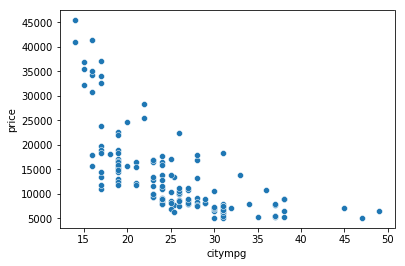

In [156]:
sns.scatterplot(df['citympg'],df['price'])  ##negative linear relation

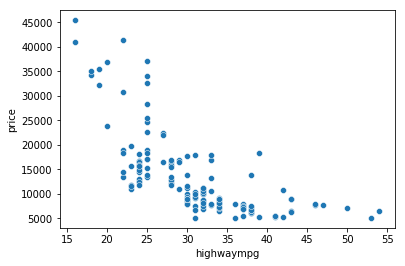

In [157]:
sns.scatterplot(df['highwaympg'],df['price'])  ##similar negative relation like that of citympg which could be due to collinearity

## Multivariate Analysis

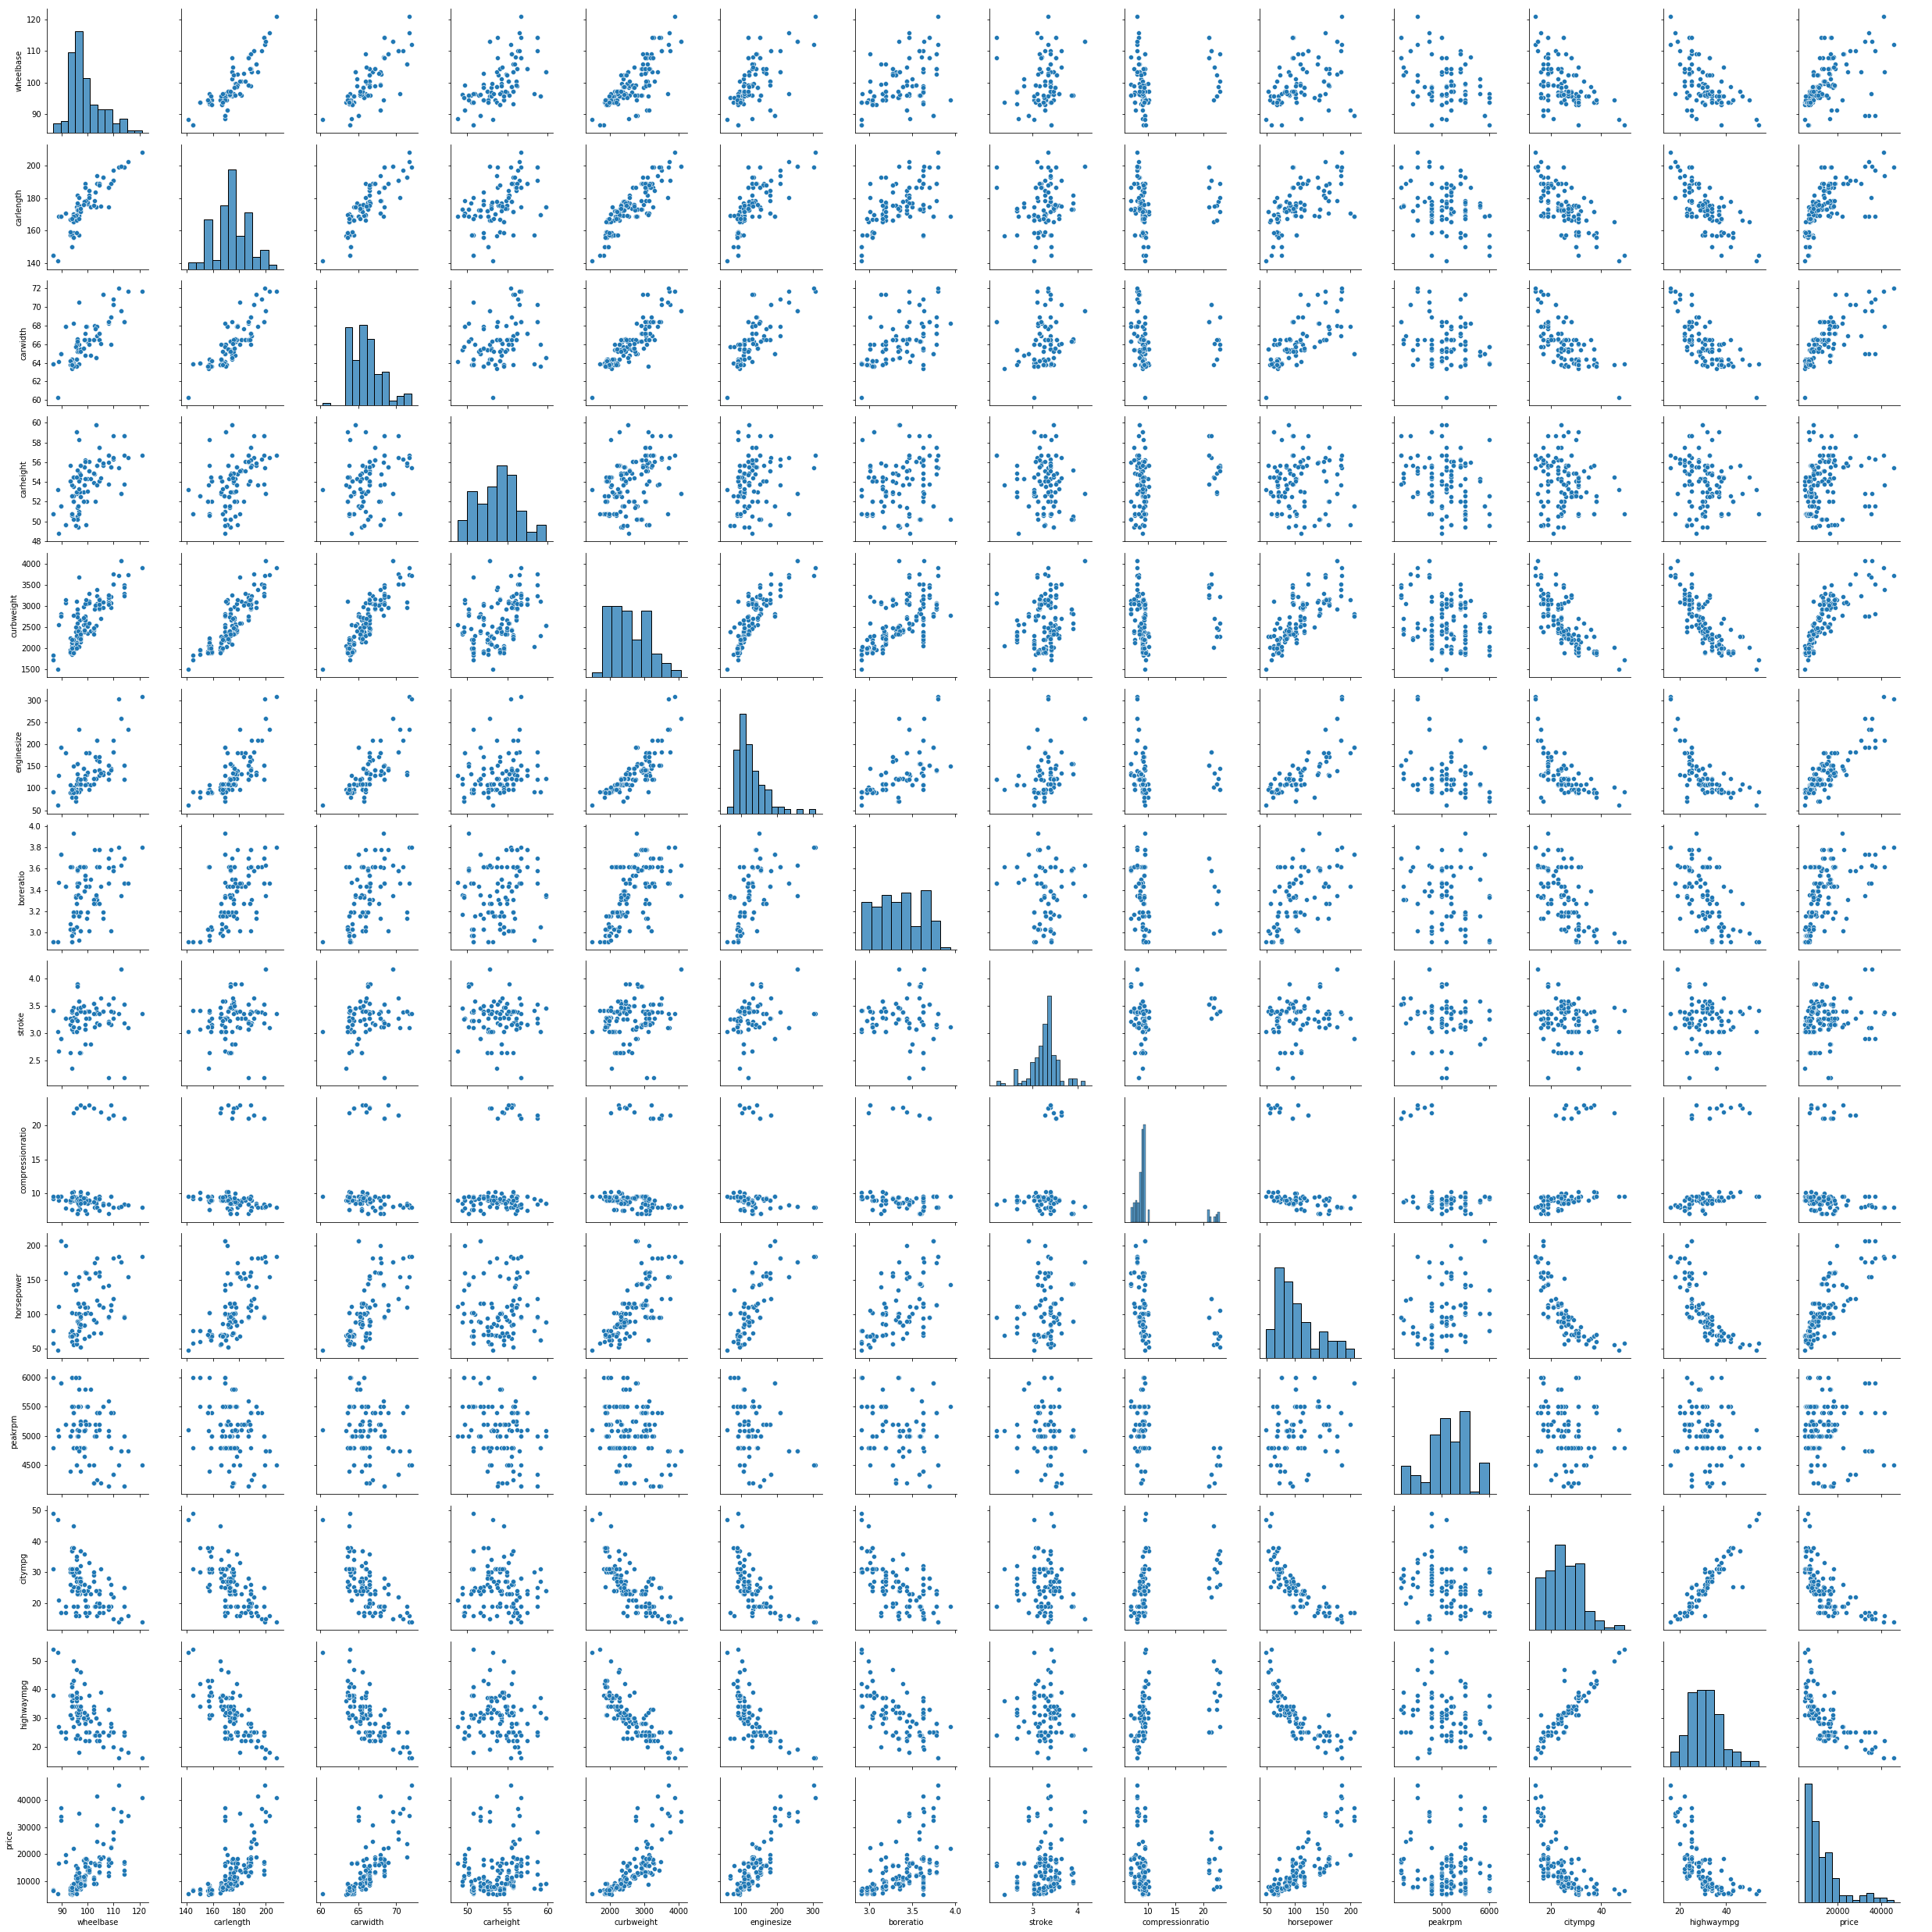

In [158]:
sns.pairplot(df)

In [159]:
df_corr = df.corr()

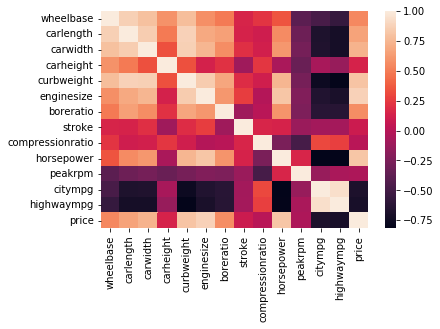

In [160]:
sns.heatmap(df_corr)

In [161]:
df_corr  ##carwidth,curbweight,enginesize,horsepower,highwaympg,city,mpg and carlength are related with price
##also there is high collinearity between variables

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.871372,0.800517,0.589884,0.782386,0.577803,0.489686,0.153306,0.231919,0.349198,-0.388959,-0.472298,-0.557150,0.548554
carlength,0.871372,1.000000,0.854351,0.493270,0.875817,0.692793,0.646024,0.146594,0.111347,0.561857,-0.312439,-0.674718,-0.719375,0.661514
carwidth,0.800517,0.854351,1.000000,0.335630,0.870437,0.745390,0.567331,0.204285,0.120055,0.614070,-0.274474,-0.663101,-0.716296,0.732475
carheight,0.589884,0.493270,0.335630,1.000000,0.334389,0.134340,0.217177,-0.095231,0.238647,-0.051704,-0.328514,-0.062359,-0.135931,0.144901
curbweight,0.782386,0.875817,0.870437,0.334389,1.000000,0.845212,0.674510,0.193961,0.112425,0.747934,-0.268259,-0.756586,-0.805453,0.809915
enginesize,0.577803,0.692793,0.745390,0.134340,0.845212,1.000000,0.610293,0.263676,-0.009498,0.815814,-0.225617,-0.656349,-0.696711,0.878902
boreratio,0.489686,0.646024,0.567331,0.217177,0.674510,0.610293,1.000000,-0.094208,0.010455,0.599349,-0.236346,-0.623956,-0.633173,0.567578
stroke,0.153306,0.146594,0.204285,-0.095231,0.193961,0.263676,-0.094208,1.000000,0.156187,0.146337,-0.116281,-0.081737,-0.075196,0.095439
compressionratio,0.231919,0.111347,0.120055,0.238647,0.112425,-0.009498,0.010455,0.156187,1.000000,-0.255566,-0.479546,0.304140,0.269368,0.011874
horsepower,0.349198,0.561857,0.614070,-0.051704,0.747934,0.815814,0.599349,0.146337,-0.255566,1.000000,0.161313,-0.818933,-0.807739,0.818480


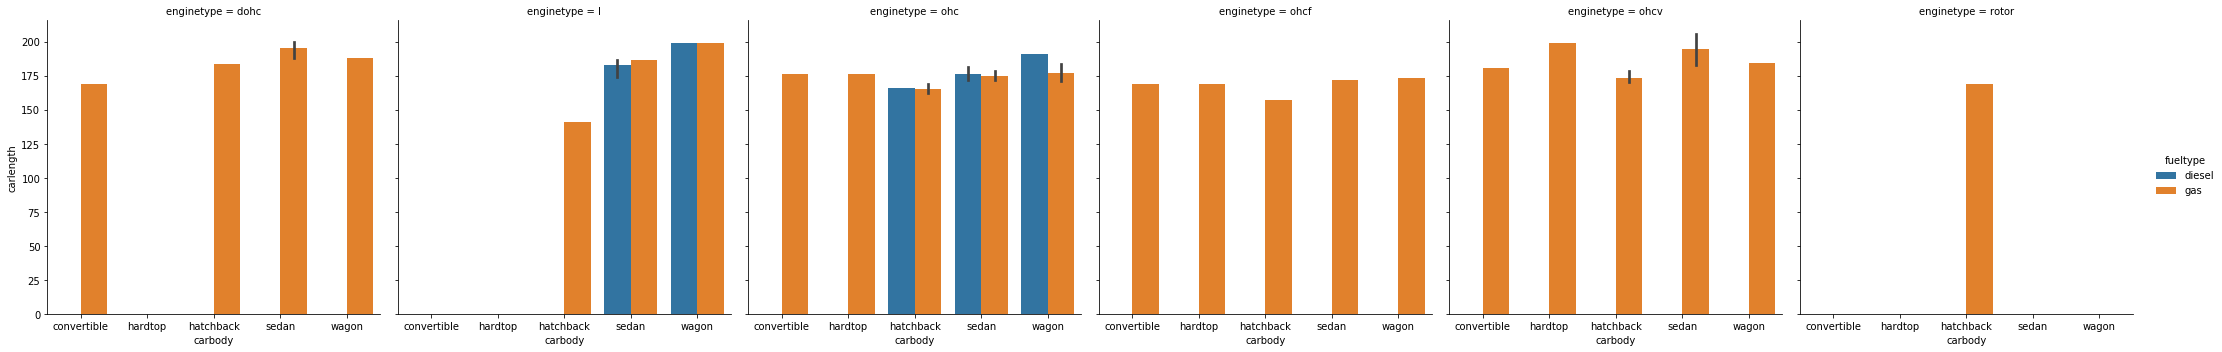

In [162]:
sns.catplot(x='carbody',y='carlength',hue ='fueltype',col='enginetype',data = df,kind="bar")  ##diesel vehicles are only in ohc and i enginetypes
##rotor has only hatchback model, ohc has no hardtop models, I has no convertible and hardtop vehicles

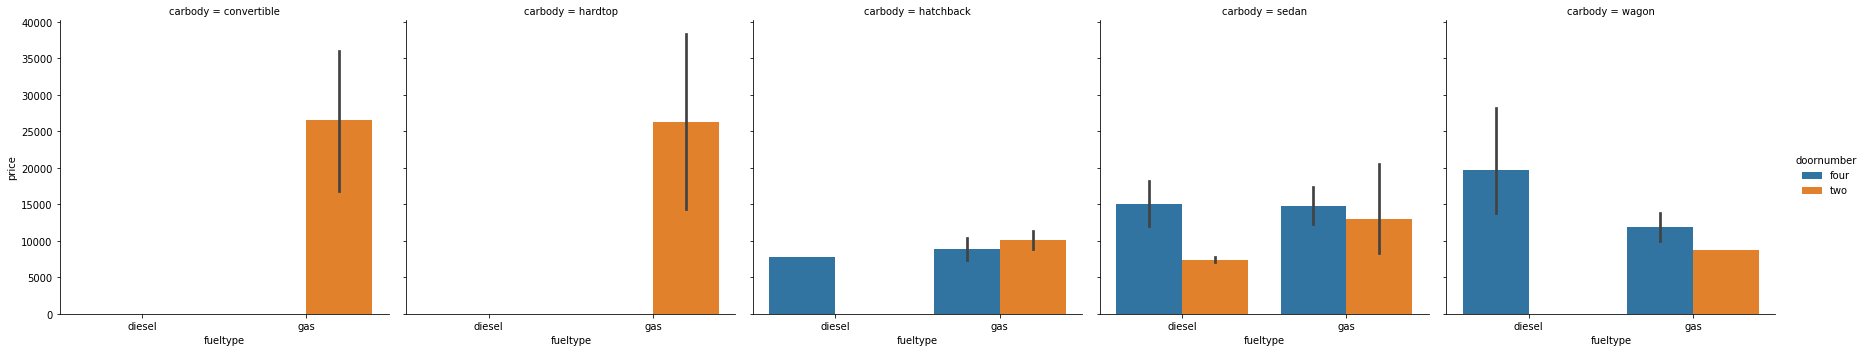

In [163]:
sns.catplot(x='fueltype',y='price',hue ='doornumber',col='carbody',data = df,kind="bar")
##convertible and hardtop vehicles are have only gas fuel type and are two doored with more price. wagon has only four door types

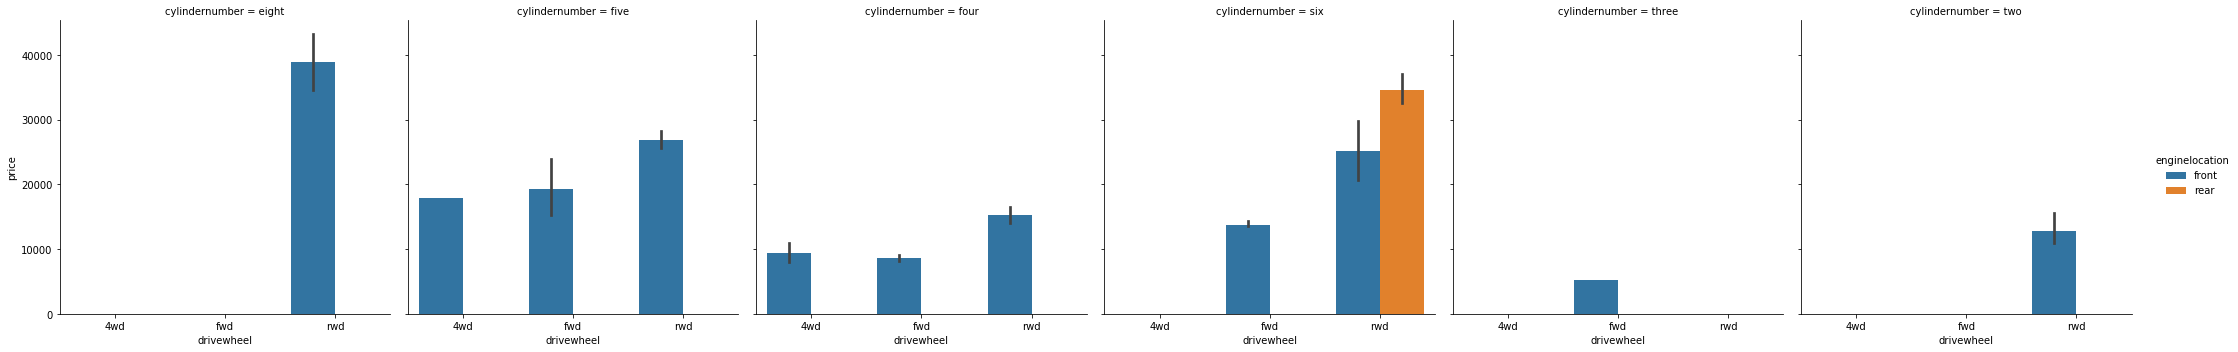

In [164]:
sns.catplot(x='drivewheel',y='price',hue = 'enginelocation',col='cylindernumber',data = df,kind="bar")
##rear engines are available only in six cylindered vehcicles.

## Binning of Categorical variables

In [165]:
def CarModel(row):
    if row['CarCompany'] in ['audi', 'porsche', 'jaguar', 'bmw', 'volvo']:
        return 'highend'
    elif row['CarCompany'] in ['peugeot', 'mazda', 'volkswagen', 'Nissan', 'renault', 'alfa-romero', 'honda', 'toyota', 'isuzu', 'chevrolet']:
        return 'midend'
    else:
        return 'lowend'

df['CarBrand'] = df.apply(lambda row: CarModel(row), axis=1)
df_test['CarBrand'] = df.apply(lambda row: CarModel(row), axis=1)

In [166]:
df['CarBrand'].value_counts()

midend     87
lowend     40
highend    26
Name: CarBrand, dtype: int64

In [167]:
df_test['CarBrand'].value_counts()

midend     27
highend    15
lowend     10
Name: CarBrand, dtype: int64

In [168]:
df.drop(['CarCompany'],axis=1,inplace=True)
df_test.drop(['CarCompany'],axis=1,inplace=True)

In [169]:
def CarEngine(row):
    if row['enginetype'] in ['ohc']:
        return 'very frequent'
    elif row['enginetype'] in ['rotor']:
        return 'rare'
    else:
        return 'less frequent'

df['engine'] = df.apply(lambda row: CarEngine(row), axis=1)
df_test['engine'] = df.apply(lambda row: CarEngine(row), axis=1)

In [170]:
df.engine.value_counts()

very frequent    111
less frequent     39
rare               3
Name: engine, dtype: int64

In [171]:
df_test.engine.value_counts()

very frequent    35
less frequent    16
rare              1
Name: engine, dtype: int64

In [172]:
df.drop(['enginetype'],axis=1,inplace=True)
df_test.drop(['enginetype'],axis=1,inplace=True)

In [173]:
def CarFuel(row):
    if row['fuelsystem'] in ['mpfi','2bbl']:
        return 'very frequent'
    elif row['fuelsystem'] in ['idi','1bbl','spdi']:
        return 'less frequent'
    else:
        return 'rare'

df['fuelsys'] = df.apply(lambda row: CarFuel(row), axis=1)
df_test['fuelsys'] = df.apply(lambda row: CarFuel(row), axis=1)

In [174]:
df_test.fuelsys.value_counts()

very frequent    43
less frequent     7
rare              2
Name: fuelsys, dtype: int64

In [175]:
df.fuelsys.value_counts()

very frequent    119
less frequent     30
rare               4
Name: fuelsys, dtype: int64

In [176]:
df.drop(['fuelsystem'],axis=1,inplace=True)
df_test.drop(['fuelsystem'],axis=1,inplace=True)

In [177]:
def CarCylinder(row):
    if row['cylindernumber'] in ['four']:
        return 'very frequent'
    elif row['cylindernumber'] in ['six','five']:
        return 'less frequent'
    else:
        return 'rare'

df['cylinder'] = df.apply(lambda row: CarCylinder(row), axis=1)
df_test['cylinder'] = df.apply(lambda row: CarCylinder(row), axis=1)

In [178]:
df.drop(['cylindernumber'],axis=1,inplace=True)
df_test.drop(['cylindernumber'],axis=1,inplace=True)

In [179]:
df.cylinder.value_counts()

very frequent    120
less frequent     25
rare               8
Name: cylinder, dtype: int64

In [180]:
df_test.cylinder.value_counts()

very frequent    41
less frequent    10
rare              1
Name: cylinder, dtype: int64

In [181]:
##symboling is categorical variable rather than int
df.symboling = df.symboling.astype('category')
df_test.symboling = df_test.symboling.astype('category')

## Outlier Treatment

In [182]:
df.skew()   ##Wheel base, enginesize,compression ratio,horsepower and price are highly skewed which could be probably due to outliers

wheelbase           0.962074
carlength           0.078336
carwidth            0.788550
carheight           0.129429
curbweight          0.558086
enginesize          1.760529
boreratio           0.075606
stroke             -0.543575
compressionratio    2.493298
horsepower          0.970254
peakrpm            -0.125938
citympg             0.684468
highwaympg          0.519263
price               1.808264
dtype: float64

In [183]:
df.kurt() ##wheelbase,carwidth,enginesize,stroke,compressionratio,citympg and price are leptokurtic
## car height,boreratio are platykurtic

wheelbase           0.715888
carlength          -0.093533
carwidth            0.709108
carheight          -0.573135
curbweight         -0.319230
enginesize          4.071408
boreratio          -1.127578
stroke              2.391083
compressionratio    4.622924
horsepower          0.147301
peakrpm            -0.166256
citympg             0.728929
highwaympg          0.399444
price               3.113138
dtype: float64

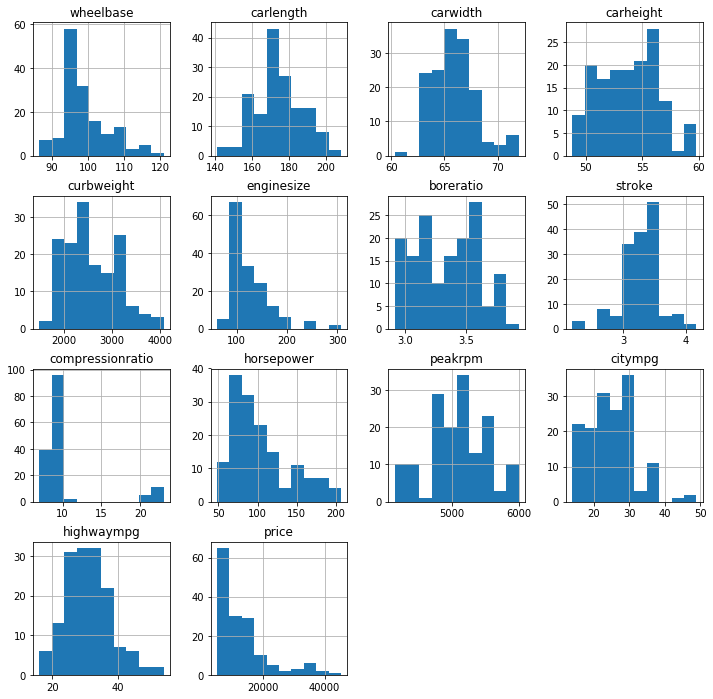

In [184]:
df.hist(sharex=False,sharey=False,figsize=(12,12));

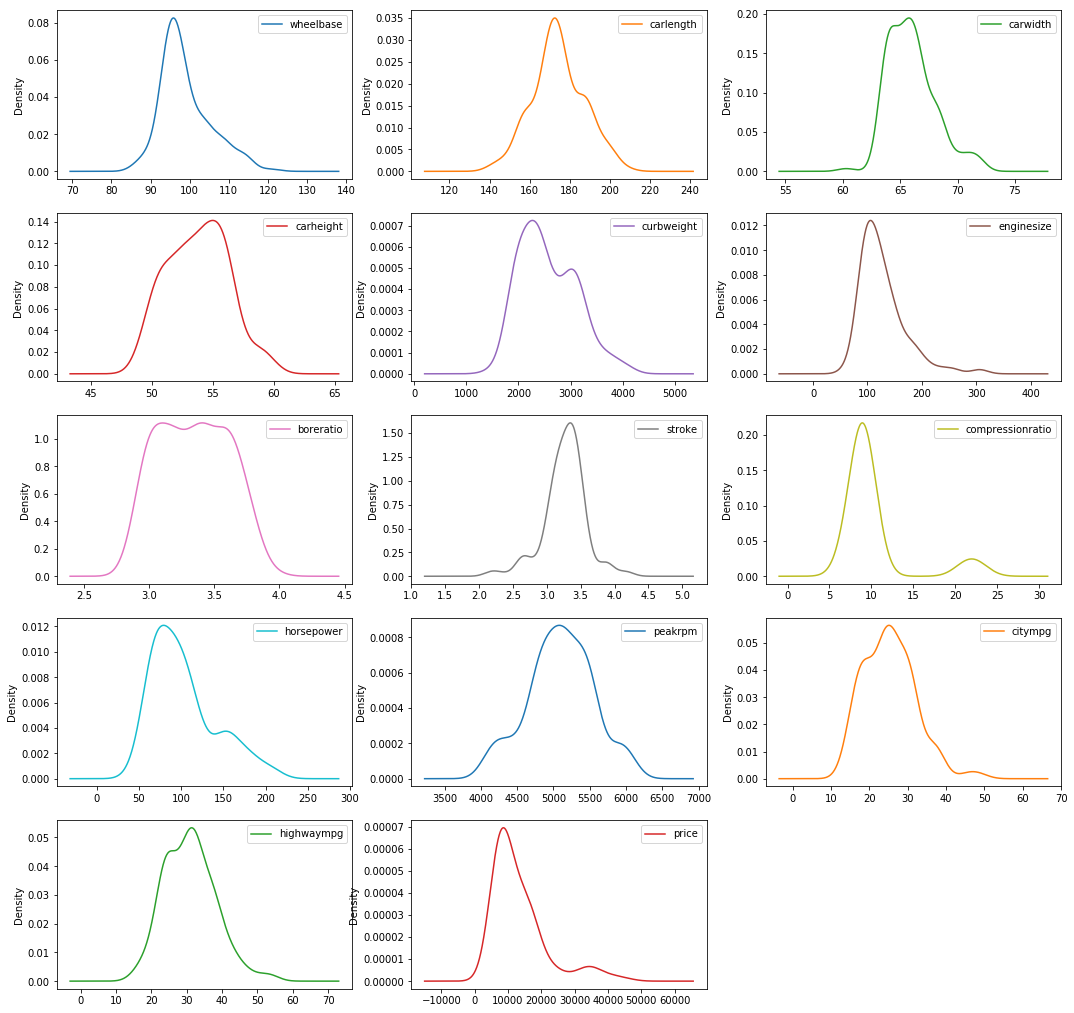

In [185]:
df.plot(kind='density',subplots=True,layout=(5,3),sharex=False,legend = True,figsize=(18,18));

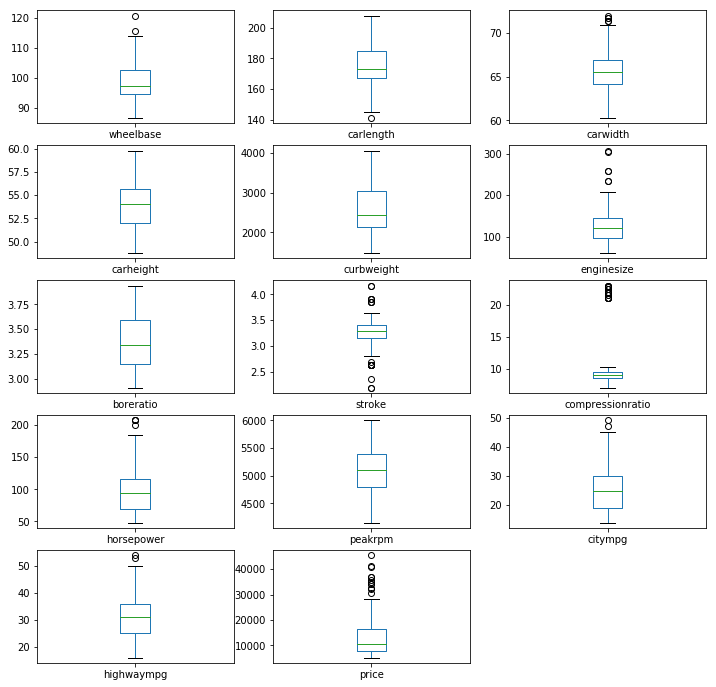

In [186]:
df.plot(kind = 'box',subplots=True,layout=(5,3),sharex=False,legend = True,figsize=(12,12));

In [187]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

In [188]:
df.CarBrand = df.CarBrand.astype('category')
df.fuelsys = df.fuelsys.astype('category')
df.engine = df.engine.astype('category')
df.cylinder = df.cylinder.astype('category')
df_test.CarBrand = df_test.CarBrand.astype('category')
df_test.fuelsys = df_test.fuelsys.astype('category')
df_test.engine = df_test.engine.astype('category')
df_test.cylinder = df_test.cylinder.astype('category')

In [189]:
df_category=df.select_dtypes('category')

In [190]:
df_num = df.drop(df_category,axis=1)   ##filtering out only numeric columns to cap outliers

In [191]:
len(df[((df_num<lower_limit)|(df_num>upper_limit)).any(axis=1)])   ###50 obseravtions out of 153 are outliers in any of the columsn which can't be trimmed..so we cap the ourliers

50

In [192]:
new_df_cap = df
new_df_cap['wheelbase'] = np.where(new_df_cap['wheelbase'] > upper_limit['wheelbase'],upper_limit['wheelbase'],np.where(new_df_cap['wheelbase'] < lower_limit['wheelbase'],
                                    lower_limit['wheelbase'],new_df_cap['wheelbase']))
new_df_cap['carlength'] = np.where(new_df_cap['carlength'] > upper_limit['carlength'],upper_limit['carlength'],np.where(new_df_cap['carlength'] < lower_limit['carlength'],
                                    lower_limit['carlength'],new_df_cap['carlength']))
new_df_cap['carwidth'] = np.where(new_df_cap['carwidth'] > upper_limit['carwidth'],upper_limit['carwidth'],np.where(new_df_cap['carwidth'] < lower_limit['carwidth'],
                                    lower_limit['carwidth'],new_df_cap['carwidth']))
new_df_cap['carheight'] = np.where(new_df_cap['carheight'] > upper_limit['carheight'],upper_limit['carheight'],np.where(new_df_cap['carheight'] < lower_limit['carheight'],
                                    lower_limit['carheight'],new_df_cap['carheight'])) 
new_df_cap['curbweight'] = np.where(new_df_cap['curbweight'] > upper_limit['curbweight'],upper_limit['curbweight'],np.where(new_df_cap['curbweight'] < lower_limit['curbweight'],
                                    lower_limit['curbweight'],new_df_cap['curbweight']))
new_df_cap['enginesize'] = np.where(new_df_cap['enginesize'] > upper_limit['enginesize'],upper_limit['enginesize'],np.where(new_df_cap['enginesize'] < lower_limit['enginesize'],
                                    lower_limit['enginesize'],new_df_cap['enginesize']))
new_df_cap['enginesize'] = np.where(new_df_cap['enginesize'] > upper_limit['enginesize'],upper_limit['enginesize'],np.where(new_df_cap['enginesize'] < lower_limit['enginesize'],
                                    lower_limit['enginesize'],new_df_cap['enginesize']))
new_df_cap['stroke'] = np.where(new_df_cap['stroke'] > upper_limit['stroke'],upper_limit['stroke'],np.where(new_df_cap['stroke'] < lower_limit['stroke'],
                                    lower_limit['stroke'],new_df_cap['stroke']))
new_df_cap['compressionratio'] = np.where(new_df_cap['compressionratio'] > upper_limit['compressionratio'],upper_limit['compressionratio'],np.where(new_df_cap['compressionratio'] < lower_limit['compressionratio'],
                                    lower_limit['compressionratio'],new_df_cap['compressionratio']))
new_df_cap['horsepower'] = np.where(new_df_cap['horsepower'] > upper_limit['horsepower'],upper_limit['horsepower'],np.where(new_df_cap['horsepower'] < lower_limit['horsepower'],
                                    lower_limit['horsepower'],new_df_cap['horsepower']))
new_df_cap['peakrpm'] = np.where(new_df_cap['peakrpm'] > upper_limit['peakrpm'],upper_limit['peakrpm'],np.where(new_df_cap['peakrpm'] < lower_limit['peakrpm'],
                                    lower_limit['peakrpm'],new_df_cap['peakrpm']))
new_df_cap['citympg'] = np.where(new_df_cap['citympg'] > upper_limit['citympg'],upper_limit['citympg'],np.where(new_df_cap['citympg'] < lower_limit['citympg'],
                                    lower_limit['citympg'],new_df_cap['citympg']))
new_df_cap['highwaympg'] = np.where(new_df_cap['highwaympg'] > upper_limit['highwaympg'],upper_limit['highwaympg'],np.where(new_df_cap['highwaympg'] < lower_limit['highwaympg'],
                                    lower_limit['highwaympg'],new_df_cap['highwaympg']))
new_df_cap['price'] = np.where(new_df_cap['price'] > upper_limit['price'],upper_limit['price'],np.where(new_df_cap['price'] < lower_limit['price'],
                                    lower_limit['price'],new_df_cap['price']))

In [193]:
##applying same limits of train data to test data

df_test['wheelbase'] = np.where(df_test['wheelbase'] > upper_limit['wheelbase'],upper_limit['wheelbase'],np.where(df_test['wheelbase'] < lower_limit['wheelbase'],
                                    lower_limit['wheelbase'],df_test['wheelbase']))
df_test['carlength'] = np.where(df_test['carlength'] > upper_limit['carlength'],upper_limit['carlength'],np.where(df_test['carlength'] < lower_limit['carlength'],
                                    lower_limit['carlength'],df_test['carlength']))
df_test['carwidth'] = np.where(df_test['carwidth'] > upper_limit['carwidth'],upper_limit['carwidth'],np.where(df_test['carwidth'] < lower_limit['carwidth'],
                                    lower_limit['carwidth'],df_test['carwidth']))
df_test['carheight'] = np.where(df_test['carheight'] > upper_limit['carheight'],upper_limit['carheight'],np.where(df_test['carheight'] < lower_limit['carheight'],
                                    lower_limit['carheight'],df_test['carheight'])) 
df_test['curbweight'] = np.where(df_test['curbweight'] > upper_limit['curbweight'],upper_limit['curbweight'],np.where(df_test['curbweight'] < lower_limit['curbweight'],
                                    lower_limit['curbweight'],df_test['curbweight']))
df_test['enginesize'] = np.where(df_test['enginesize'] > upper_limit['enginesize'],upper_limit['enginesize'],np.where(df_test['enginesize'] < lower_limit['enginesize'],
                                    lower_limit['enginesize'],df_test['enginesize']))
df_test['enginesize'] = np.where(df_test['enginesize'] > upper_limit['enginesize'],upper_limit['enginesize'],np.where(df_test['enginesize'] < lower_limit['enginesize'],
                                    lower_limit['enginesize'],df_test['enginesize']))
df_test['stroke'] = np.where(df_test['stroke'] > upper_limit['stroke'],upper_limit['stroke'],np.where(df_test['stroke'] < lower_limit['stroke'],
                                    lower_limit['stroke'],df_test['stroke']))
df_test['compressionratio'] = np.where(df_test['compressionratio'] > upper_limit['compressionratio'],upper_limit['compressionratio'],np.where(df_test['compressionratio'] < lower_limit['compressionratio'],
                                    lower_limit['compressionratio'],df_test['compressionratio']))
df_test['horsepower'] = np.where(df_test['horsepower'] > upper_limit['horsepower'],upper_limit['horsepower'],np.where(df_test['horsepower'] < lower_limit['horsepower'],
                                    lower_limit['horsepower'],df_test['horsepower']))
df_test['peakrpm'] = np.where(df_test['peakrpm'] > upper_limit['peakrpm'],upper_limit['peakrpm'],np.where(df_test['peakrpm'] < lower_limit['peakrpm'],
                                    lower_limit['peakrpm'],df_test['peakrpm']))
df_test['citympg'] = np.where(df_test['citympg'] > upper_limit['citympg'],upper_limit['citympg'],np.where(df_test['citympg'] < lower_limit['citympg'],
                                    lower_limit['citympg'],df_test['citympg']))
df_test['highwaympg'] = np.where(df_test['highwaympg'] > upper_limit['highwaympg'],upper_limit['highwaympg'],np.where(df_test['highwaympg'] < lower_limit['highwaympg'],
                                    lower_limit['highwaympg'],df_test['highwaympg']))


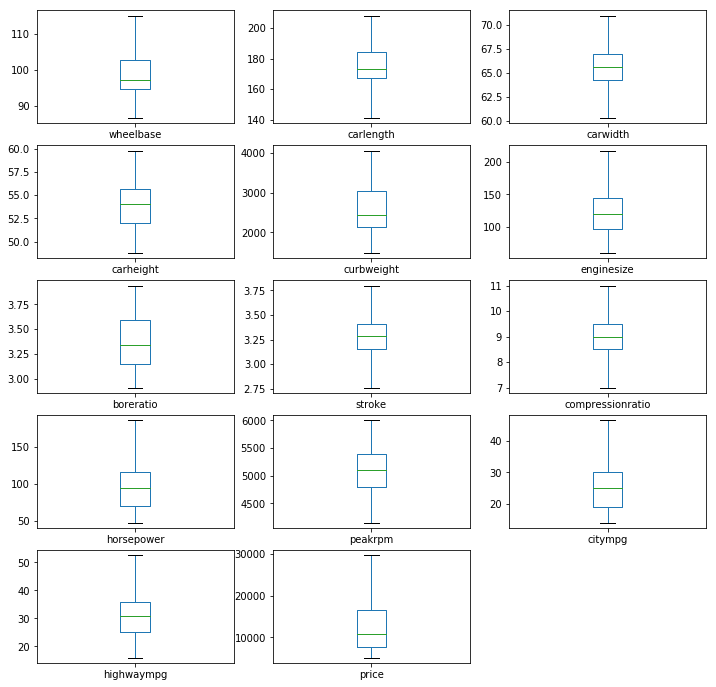

In [194]:
new_df_cap.plot(kind = 'box',subplots=True,layout=(5,3),sharex=False,legend = True,figsize=(12,12));   ##outliers successfully capped

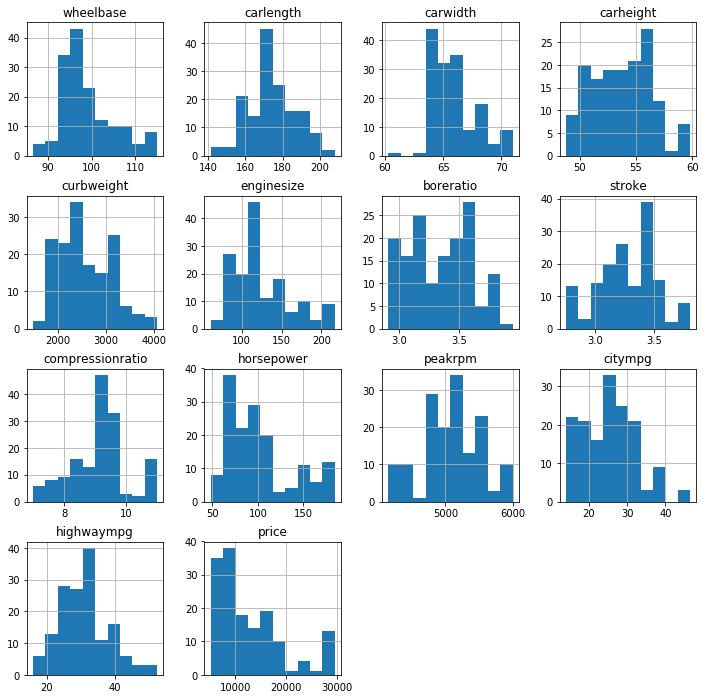

In [195]:
new_df_cap.hist(sharex=False,sharey=False,figsize=(12,12));

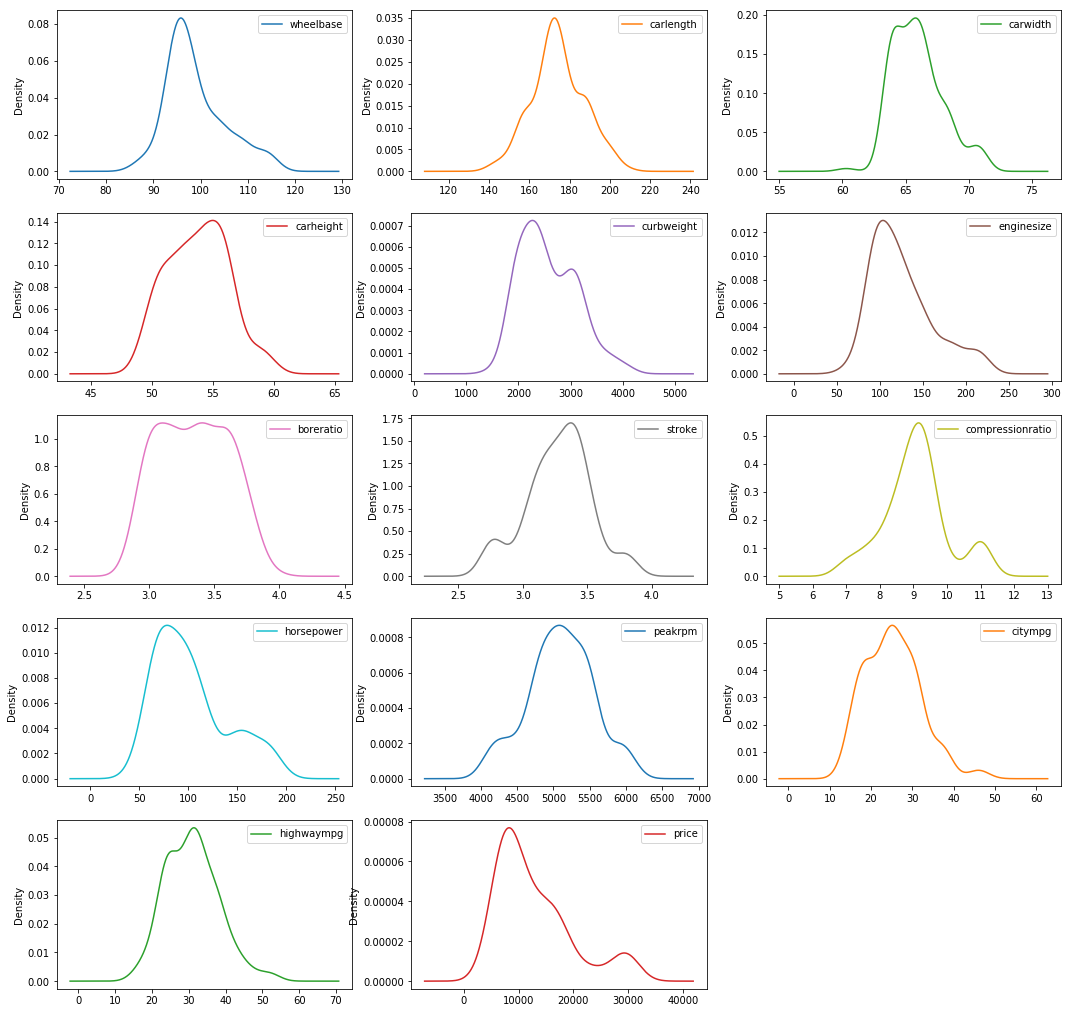

In [196]:
new_df_cap.plot(kind='density',subplots=True,layout=(5,3),sharex=False,legend = True,figsize=(18,18));

In [197]:
new_df_cap.skew()   ##most of the variables are at moderate skewness but price is highly skewed, we may have to take log scale to reduce skewness on price

wheelbase           0.851602
carlength           0.080618
carwidth            0.647015
carheight           0.129429
curbweight          0.558086
enginesize          0.984602
boreratio           0.075606
stroke             -0.217902
compressionratio    0.199067
horsepower          0.840237
peakrpm            -0.125938
citympg             0.613471
highwaympg          0.479890
price               1.214927
dtype: float64

In [198]:
new_df_cap.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand,engine,fuelsys,cylinder
0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.000000,24.0,30.0,13950.0,highend,very frequent,very frequent,very frequent
1,0,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285.0,120.0,3.46,2.76,8.4,95.0,5000.000000,19.0,24.0,16695.0,midend,less frequent,very frequent,very frequent
2,3,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833.0,156.0,3.58,3.80,7.0,145.0,5000.000000,19.0,24.0,12629.0,lowend,very frequent,less frequent,very frequent
3,1,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040.0,92.0,3.05,3.03,9.0,62.0,4800.000000,31.0,38.0,6338.0,midend,very frequent,very frequent,very frequent
4,2,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975.0,146.0,3.62,3.50,9.3,116.0,5096.232877,24.0,30.0,17669.0,midend,very frequent,very frequent,very frequent


## Dummies of categorical data and scaling continuous variables

In [199]:
new_df_dummy = pd.get_dummies(new_df_cap,columns=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
                                                 'engine','cylinder','fuelsys','CarBrand'],drop_first=True)

In [200]:
df_test = pd.get_dummies(df_test,columns=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
                                                 'engine','cylinder','fuelsys','CarBrand'],drop_first=True)

In [201]:
new_df_dummy.shape  ##after getting dummies number of columns is 37

(153, 37)

In [202]:
new_df_dummy.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,engine_rare,engine_very frequent,cylinder_rare,cylinder_very frequent,fuelsys_rare,fuelsys_very frequent,CarBrand_lowend,CarBrand_midend
0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.000000,24.0,30.0,13950.0,0,...,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
1,114.2,198.9,68.4,56.7,3285.0,120.0,3.46,2.76,8.4,95.0,5000.000000,19.0,24.0,16695.0,0,...,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1
2,95.9,173.2,66.3,50.2,2833.0,156.0,3.58,3.80,7.0,145.0,5000.000000,19.0,24.0,12629.0,0,...,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,95.7,158.7,63.6,54.5,2040.0,92.0,3.05,3.03,9.0,62.0,4800.000000,31.0,38.0,6338.0,0,...,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
4,98.4,176.2,65.6,53.0,2975.0,146.0,3.62,3.50,9.3,116.0,5096.232877,24.0,30.0,17669.0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1


In [203]:
##preserve actual y stats for getting predicted value in original scale
orig_price_mean = new_df_dummy['price'].mean()
orig_price_std = new_df_dummy['price'].std()

In [204]:
##since price is highly skewed we can apply transformation to reduce skewness
np.log(new_df_dummy.price).skew()
new_df_dummy['price']= np.log(new_df_dummy.price)

In [205]:
##continuous variables to be scaled
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
new_df_dummy[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
             'horsepower','peakrpm','citympg','highwaympg']] = stdscaler.fit_transform(new_df_dummy[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
                                                                                                     'horsepower','peakrpm','citympg','highwaympg']])

In [206]:
df_test[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
             'horsepower','peakrpm','citympg','highwaympg']] = stdscaler.transform(df_test[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
                                                                                                     'horsepower','peakrpm','citympg','highwaympg']])

In [207]:
new_df_dummy.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,engine_rare,engine_very frequent,cylinder_rare,cylinder_very frequent,fuelsys_rare,fuelsys_very frequent,CarBrand_lowend,CarBrand_midend
0,0.140810,0.176270,0.113201,0.212953,-0.440687,-0.467984,-0.576026,0.505928,0.990070,-0.009847,9.091802e-01,-0.201874,-0.132937,9.543235,0,...,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
1,2.465356,1.918889,1.222217,1.184919,1.321916,-0.160201,0.445931,-2.090055,-0.718617,-0.201597,-2.166918e-01,-0.954917,-0.975263,9.722865,0,...,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1
2,-0.488754,-0.089421,0.163611,-1.447490,0.481518,0.847089,0.900134,2.128417,-2.213718,1.168047,-2.166918e-01,-0.954917,-0.975263,9.443751,0,...,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,-0.521040,-1.222514,-1.197453,0.293950,-0.992895,-0.943648,-1.105929,-0.994875,-0.077859,-1.105563,-6.670406e-01,0.852385,0.990164,8.754319,0,...,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
4,-0.085187,0.145012,-0.189257,-0.313529,0.745537,0.567286,1.051535,0.911550,0.242520,0.373653,2.047949e-15,-0.201874,-0.132937,9.779567,0,...,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1


In [208]:
final_df = new_df_dummy

In [209]:
df_num

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,99.8,176.6,66.200000,54.3,2337.0,109,3.19,3.40,10.0,102,5500.000000,24.0,30.0,13950.0
1,114.2,198.9,68.400000,56.7,3285.0,120,3.46,2.19,8.4,95,5000.000000,19.0,24.0,16695.0
2,95.9,173.2,66.300000,50.2,2833.0,156,3.58,3.86,7.0,145,5000.000000,19.0,24.0,12629.0
3,95.7,158.7,63.600000,54.5,2040.0,92,3.05,3.03,9.0,62,4800.000000,31.0,38.0,6338.0
4,98.4,176.2,65.600000,53.0,2975.0,146,3.62,3.50,9.3,116,5096.232877,24.0,30.0,17669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,113.0,199.6,69.600000,52.8,4066.0,258,3.63,4.17,8.1,176,4750.000000,15.0,19.0,35550.0
149,93.7,167.3,63.800000,50.8,2191.0,98,2.97,3.23,9.4,68,5500.000000,31.0,38.0,7609.0
150,100.4,180.2,65.997987,55.1,2579.0,97,3.01,3.40,23.0,68,4500.000000,33.0,38.0,13845.0
151,98.4,176.2,65.600000,52.0,2714.0,146,3.62,3.50,9.3,116,4800.000000,24.0,30.0,11549.0


In [210]:
final_df[df_num.columns]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.140810,0.176270,0.113201,0.212953,-0.440687,-0.467984,-0.576026,0.505928,0.990070,-0.009847,9.091802e-01,-0.201874,-0.132937,9.543235
1,2.465356,1.918889,1.222217,1.184919,1.321916,-0.160201,0.445931,-2.090055,-0.718617,-0.201597,-2.166918e-01,-0.954917,-0.975263,9.722865
2,-0.488754,-0.089421,0.163611,-1.447490,0.481518,0.847089,0.900134,2.128417,-2.213718,1.168047,-2.166918e-01,-0.954917,-0.975263,9.443751
3,-0.521040,-1.222514,-1.197453,0.293950,-0.992895,-0.943648,-1.105929,-0.994875,-0.077859,-1.105563,-6.670406e-01,0.852385,0.990164,8.754319
4,-0.085187,0.145012,-0.189257,-0.313529,0.745537,0.567286,1.051535,0.911550,0.242520,0.373653,2.047949e-15,-0.201874,-0.132937,9.779567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2.271643,1.973590,1.827135,-0.394526,2.774018,2.553885,1.089385,2.128417,-1.038996,2.017227,-7.796278e-01,-1.557351,-1.677201,10.295107
149,-0.843893,-0.550472,-1.096634,-1.204498,-0.712143,-0.775767,-1.408731,-0.183630,0.349313,-0.941206,9.091802e-01,0.852385,0.990164,8.937087
150,0.237666,0.457590,0.011367,0.536942,0.009260,-0.803747,-1.257330,0.505928,2.058000,-0.941206,-1.342564e+00,1.153602,0.990164,9.535679
151,-0.085187,0.145012,-0.189257,-0.718515,0.260263,0.567286,1.051535,0.911550,0.242520,0.373653,-6.670406e-01,-0.201874,-0.132937,9.354354


In [211]:
def vif_cal(df,target):
    x_vars = df.drop([target],axis=1)
    xvar_names= x_vars.columns
    
    for i in range(0,len(xvar_names)):
        y=x_vars[xvar_names[i]]
        x= x_vars[xvar_names.drop(xvar_names[i])]
        rsq = smf.ols(formula ='y~x',data=x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i],"VIF = ", vif)

In [212]:
##vif is to be calculated for continuous variables to check for their multicollinearity, so we pass only numeric columns 
vif_cal(final_df[df_num.columns],'price')


wheelbase VIF =  7.06
carlength VIF =  8.86
carwidth VIF =  5.59
carheight VIF =  1.99
curbweight VIF =  14.45
enginesize VIF =  8.91
boreratio VIF =  2.6
stroke VIF =  1.33
compressionratio VIF =  1.93
horsepower VIF =  11.59
peakrpm VIF =  2.24
citympg VIF =  10.83
highwaympg VIF =  10.73


In [213]:
##let vif upper limit be 5
## curbweight has highest vif and needs to be dropped
final_df = final_df.drop(['curbweight'],axis=1)
df_test = df_test.drop(['curbweight'],axis=1)
df_num_col = df_num.columns.drop('curbweight')
df_num_col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

In [214]:
vif_cal(final_df[df_num_col],'price')

wheelbase VIF =  6.32
carlength VIF =  8.73
carwidth VIF =  5.38
carheight VIF =  1.98
enginesize VIF =  8.0
boreratio VIF =  2.59
stroke VIF =  1.33
compressionratio VIF =  1.81
horsepower VIF =  11.05
peakrpm VIF =  2.11
citympg VIF =  10.64
highwaympg VIF =  10.46


In [215]:
##horsepower has high vif and  could be dropped
final_df = final_df.drop(['horsepower'],axis = 1)
df_test = df_test.drop(['horsepower'],axis = 1)
df_num_col = df_num_col.drop('horsepower')

In [216]:
vif_cal(final_df[df_num_col],'price')

wheelbase VIF =  6.26
carlength VIF =  8.73
carwidth VIF =  5.34
carheight VIF =  1.95
enginesize VIF =  3.29
boreratio VIF =  2.56
stroke VIF =  1.32
compressionratio VIF =  1.67
peakrpm VIF =  1.67
citympg VIF =  10.39
highwaympg VIF =  10.25


In [217]:
##citympg has high vif and could be dropped
final_df = final_df.drop(['citympg'],axis=1)
df_test = df_test.drop(['citympg'],axis=1)
df_num_col = df_num_col.drop('citympg')

In [218]:
vif_cal(final_df[df_num_col],'price')

wheelbase VIF =  6.07
carlength VIF =  8.26
carwidth VIF =  5.32
carheight VIF =  1.93
enginesize VIF =  3.29
boreratio VIF =  2.47
stroke VIF =  1.32
compressionratio VIF =  1.6
peakrpm VIF =  1.55
highwaympg VIF =  4.94


In [219]:
##carlength has high vif and could be dropped
final_df = final_df.drop(['carlength'],axis=1)
df_test = df_test.drop(['carlength'],axis=1)
df_num_col = df_num_col.drop('carlength')

In [220]:
vif_cal(final_df[df_num_col],'price')

wheelbase VIF =  4.56
carwidth VIF =  4.94
carheight VIF =  1.85
enginesize VIF =  3.23
boreratio VIF =  2.35
stroke VIF =  1.32
compressionratio VIF =  1.6
peakrpm VIF =  1.55
highwaympg VIF =  4.67


In [221]:
final_df['wheelbase'].corr(final_df['carwidth'])

0.7984943877379611

In [222]:
##wheelbase and carwidth are highly correlated and we can drop carwidth
final_df = final_df.drop(['carwidth'],axis=1)
df_test = df_test.drop(['carwidth'],axis=1)
df_num_col = df_num_col.drop('carwidth')

In [223]:
vif_cal(final_df[df_num_col],'price')

wheelbase VIF =  3.21
carheight VIF =  1.83
enginesize VIF =  2.87
boreratio VIF =  2.35
stroke VIF =  1.31
compressionratio VIF =  1.59
peakrpm VIF =  1.54
highwaympg VIF =  4.29


In [224]:
from sklearn.model_selection import train_test_split
test_size = 0.2
seed =10
train_set,val_set=train_test_split(final_df,test_size=test_size,random_state=seed)

In [225]:
import statsmodels.api as sm

y=train_set[['price']]
X = train_set.drop(['price'],axis=1)
X = sm.add_constant(X)

In [226]:
lm1 = sm.OLS(y,X)
res1 = lm1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     38.15
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.60e-39
Time:                        13:52:50   Log-Likelihood:                 77.670
No. Observations:                 122   AIC:                            -91.34
Df Residuals:                      90   BIC:                            -1.611
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [227]:
X = train_set.drop(['price','carbody_hardtop'],axis=1)
X = sm.add_constant(X)
lm2 = sm.OLS(y,X)
res2 = lm2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     36.22
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.29e-38
Time:                        13:52:50   Log-Likelihood:                 72.261
No. Observations:                 122   AIC:                            -82.52
Df Residuals:                      91   BIC:                             4.404
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [228]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan'],axis=1)
X = sm.add_constant(X)
lm3 = sm.OLS(y,X)
res3 = lm3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     37.87
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.08e-39
Time:                        13:52:50   Log-Likelihood:                 72.249
No. Observations:                 122   AIC:                            -84.50
Df Residuals:                      92   BIC:                           -0.3773
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [229]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd'],axis=1)
X = sm.add_constant(X)
lm4 = sm.OLS(y,X)
res4 = lm4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     39.64
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           3.29e-40
Time:                        13:52:51   Log-Likelihood:                 72.236
No. Observations:                 122   AIC:                            -86.47
Df Residuals:                      93   BIC:                            -5.155
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [230]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1'],axis=1)
X = sm.add_constant(X)
lm5 = sm.OLS(y,X)
res5 = lm5.fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     41.53
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           5.19e-41
Time:                        13:52:51   Log-Likelihood:                 72.198
No. Observations:                 122   AIC:                            -88.40
Df Residuals:                      94   BIC:                            -9.883
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [231]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare'],axis=1)
X = sm.add_constant(X)
lm6 = sm.OLS(y,X)
res6 = lm6.fit()
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     43.50
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           8.37e-42
Time:                        13:52:51   Log-Likelihood:                 72.098
No. Observations:                 122   AIC:                            -90.20
Df Residuals:                      95   BIC:                            -14.49
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [232]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio'],axis=1)
X = sm.add_constant(X)
lm7 = sm.OLS(y,X)
res7 = lm7.fit()
print(res7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     45.61
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.35e-42
Time:                        13:52:51   Log-Likelihood:                 71.964
No. Observations:                 122   AIC:                            -91.93
Df Residuals:                      96   BIC:                            -19.02
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [233]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio'],axis=1)
X = sm.add_constant(X)
lm8 = sm.OLS(y,X)
res8 = lm8.fit()
print(res8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     47.87
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.20e-43
Time:                        13:52:51   Log-Likelihood:                 71.796
No. Observations:                 122   AIC:                            -93.59
Df Residuals:                      97   BIC:                            -23.49
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [234]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1'],axis=1)
X = sm.add_constant(X)
lm9 = sm.OLS(y,X)
res9 = lm9.fit()
print(res9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     50.31
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           3.49e-44
Time:                        13:52:51   Log-Likelihood:                 71.626
No. Observations:                 122   AIC:                            -95.25
Df Residuals:                      98   BIC:                            -27.96
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [235]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent'],axis=1)
X = sm.add_constant(X)
lm10 = sm.OLS(y,X)
res10 = lm10.fit()
print(res10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     52.98
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           5.35e-45
Time:                        13:52:52   Log-Likelihood:                 71.468
No. Observations:                 122   AIC:                            -96.94
Df Residuals:                      99   BIC:                            -32.44
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [236]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback'],axis=1)
X = sm.add_constant(X)
lm11 = sm.OLS(y,X)
res11 = lm11.fit()
print(res11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     55.46
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.15e-45
Time:                        13:52:52   Log-Likelihood:                 70.854
No. Observations:                 122   AIC:                            -97.71
Df Residuals:                     100   BIC:                            -36.02
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [237]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0'],axis=1)
X = sm.add_constant(X)
lm12 = sm.OLS(y,X)
res12 = lm12.fit()
print(res12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     58.12
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.55e-46
Time:                        13:52:52   Log-Likelihood:                 70.188
No. Observations:                 122   AIC:                            -98.38
Df Residuals:                     101   BIC:                            -39.49
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [238]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight'],axis=1)
X = sm.add_constant(X)
lm13 = sm.OLS(y,X)
res13 = lm13.fit()
print(res13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     61.08
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           5.43e-47
Time:                        13:52:52   Log-Likelihood:                 69.543
No. Observations:                 122   AIC:                            -99.09
Df Residuals:                     102   BIC:                            -43.01
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [239]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight','fuelsys_rare'],axis=1)
X = sm.add_constant(X)
lm14 = sm.OLS(y,X)
res14 = lm14.fit()
print(res14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     63.87
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.61e-47
Time:                        13:52:52   Log-Likelihood:                 68.476
No. Observations:                 122   AIC:                            -98.95
Df Residuals:                     103   BIC:                            -45.68
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [240]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight','fuelsys_rare','cylinder_very frequent'],axis=1)
X = sm.add_constant(X)
lm15 = sm.OLS(y,X)
res15 = lm15.fit()
print(res15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     66.98
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           4.76e-48
Time:                        13:52:52   Log-Likelihood:                 67.390
No. Observations:                 122   AIC:                            -98.78
Df Residuals:                     104   BIC:                            -48.31
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.6363 

In [241]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight','fuelsys_rare','cylinder_very frequent',
                   'enginelocation_rear'],axis=1)
X = sm.add_constant(X)
lm16 = sm.OLS(y,X)
res16 = lm16.fit()
print(res16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     70.69
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.19e-48
Time:                        13:52:53   Log-Likelihood:                 66.487
No. Observations:                 122   AIC:                            -98.97
Df Residuals:                     105   BIC:                            -51.31
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.6694 

In [242]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight','fuelsys_rare','cylinder_very frequent',
                   'enginelocation_rear','symboling_2'],axis=1)
X = sm.add_constant(X)
lm17 = sm.OLS(y,X)
res17 = lm17.fit()
print(res17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     74.38
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           4.06e-49
Time:                        13:52:53   Log-Likelihood:                 65.191
No. Observations:                 122   AIC:                            -98.38
Df Residuals:                     106   BIC:                            -53.52
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.6976 

In [243]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight','fuelsys_rare','cylinder_very frequent',
                   'enginelocation_rear','symboling_2','wheelbase'],axis=1)
X = sm.add_constant(X)
lm18 = sm.OLS(y,X)
res18 = lm18.fit()
print(res18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     77.85
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.15e-49
Time:                        13:52:53   Log-Likelihood:                 63.374
No. Observations:                 122   AIC:                            -96.75
Df Residuals:                     107   BIC:                            -54.69
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.7808 

In [244]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight','fuelsys_rare','cylinder_very frequent',
                   'enginelocation_rear','symboling_2','wheelbase','stroke'],axis=1)
X = sm.add_constant(X)
lm19 = sm.OLS(y,X)
res19 = lm19.fit()
print(res19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     82.68
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           7.10e-50
Time:                        13:52:53   Log-Likelihood:                 62.080
No. Observations:                 122   AIC:                            -96.16
Df Residuals:                     108   BIC:                            -56.90
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.8239 

In [245]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight','fuelsys_rare','cylinder_very frequent',
                   'enginelocation_rear','symboling_2','wheelbase','stroke','peakrpm'],axis=1)
X = sm.add_constant(X)
lm20 = sm.OLS(y,X)
res20 = lm20.fit()
print(res20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     87.53
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           3.54e-50
Time:                        13:52:53   Log-Likelihood:                 60.295
No. Observations:                 122   AIC:                            -94.59
Df Residuals:                     109   BIC:                            -58.14
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.8156 

In [246]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight','fuelsys_rare','cylinder_very frequent',
                   'enginelocation_rear','symboling_2','wheelbase','stroke','peakrpm','aspiration_turbo'],axis=1)
X = sm.add_constant(X)
lm21 = sm.OLS(y,X)
res21 = lm21.fit()
print(res21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     93.39
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.64e-50
Time:                        13:52:53   Log-Likelihood:                 58.570
No. Observations:                 122   AIC:                            -93.14
Df Residuals:                     110   BIC:                            -59.49
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.8767 

In [247]:
X = train_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight','fuelsys_rare','cylinder_very frequent',
                   'enginelocation_rear','symboling_2','wheelbase','stroke','peakrpm','aspiration_turbo','carbody_wagon'],axis=1)
X = sm.add_constant(X)
lm22 = sm.OLS(y,X)
res22 = lm22.fit()
print(res22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     99.88
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           9.98e-51
Time:                        13:52:54   Log-Likelihood:                 56.520
No. Observations:                 122   AIC:                            -91.04
Df Residuals:                     111   BIC:                            -60.20
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.8539 

In [248]:
log_y_pred = res22.predict(X)

In [249]:
y_pred = np.exp(log_y_pred)
y_pred.head()

114     6982.589320
79     23229.173262
117     9889.355035
105     7216.089263
119    10295.609368
dtype: float64

In [250]:
df_test_size = 0.2
seed =10
df_train_set,df_val_set=train_test_split(df,test_size=df_test_size,random_state=seed)
orig_y = df_train_set['price']
orig_val_y = df_val_set['price']

In [251]:
train_residuals = orig_y - y_pred

In [252]:
sse = np.sum((train_residuals)**2)

In [253]:
mse = sse/len(train_residuals)

In [254]:
rmse = np.sqrt(mse)
rmse

2049.0933937693476

In [255]:
from sklearn.metrics import r2_score

In [256]:
r2_score(orig_y,y_pred)

0.9115408722065343

## Validating the model using validation data set

In [260]:
val_X = val_set.drop(['price','carbody_hardtop','carbody_sedan','drivewheel_rwd','symboling_-1','engine_rare','compressionratio','boreratio',
                   'symboling_1','fuelsys_very frequent','carbody_hatchback','symboling_0','carheight','fuelsys_rare','cylinder_very frequent',
                   'enginelocation_rear','symboling_2','wheelbase','stroke','peakrpm','aspiration_turbo','carbody_wagon'],axis=1)
val_X = sm.add_constant(val_X)

log_val_y_pred = res22.predict(val_X)
val_y_pred = np.exp(log_val_y_pred)
val_y_pred.head()

91    15655.886316
59    11504.569284
76     9303.962732
96     9943.026804
70     5713.422760
dtype: float64

In [261]:
val_set.head()

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,engine_rare,engine_very frequent,cylinder_rare,cylinder_very frequent,fuelsys_rare,fuelsys_very frequent,CarBrand_lowend,CarBrand_midend
91,1.448367,1.184919,0.735168,1.354337,0.992674,2.058000,-2.130674e+00,0.288226,9.795345,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
59,-0.327327,0.455944,-0.495964,1.051535,-2.090055,-1.466167,-6.670406e-01,-1.115650,9.366831,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
76,-0.424184,-0.880509,-0.440003,-0.651726,0.749301,-1.679753,9.091802e-01,-0.132937,9.135509,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
96,0.705804,2.440376,-0.104240,0.029578,0.749301,-0.611824,2.047949e-15,-0.132937,9.096163,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0
70,-0.843893,-0.475523,-1.307392,-1.635832,-0.832626,1.096863,9.091802e-01,1.551715,8.593969,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1


In [262]:
orig_val_y.head()

91    17950.0
59    11694.0
76     9279.0
96     8921.0
70     5399.0
Name: price, dtype: float64

In [263]:
val_residuals = orig_val_y - val_y_pred
val_residuals.head()

91    2294.113684
59     189.430716
76     -24.962732
96   -1022.026804
70    -314.422760
dtype: float64

In [264]:
sse_val = np.sum((val_residuals)**2)
sse_val

118696953.10111776

In [265]:
mse_val = sse_val/len(val_residuals)

In [266]:
rmse_val = np.sqrt(mse_val)
rmse_val

1956.7662024380427

In [267]:
r2_score(orig_val_y,val_y_pred)

0.9019240253935987

### The model performed well on validation data set

In [268]:
from sklearn.metrics import mean_squared_error
mean_squared_error(orig_y,y_pred)

4198783.7363891825

In [269]:
rmse_orig = np.sqrt(mean_squared_error(orig_y,y_pred))

In [270]:
rmse_orig

2049.0933937693476

In [271]:
rmse_val = np.sqrt(mean_squared_error(orig_val_y,val_y_pred))
rmse_val

1956.7662024380427

## Test data prediction

In [272]:
X.head()

,const,enginesize,highwaympg,symboling_3,fueltype_gas,doornumber_two,drivewheel_fwd,engine_very frequent,cylinder_rare,CarBrand_lowend,CarBrand_midend
114,1.0,-0.803747,0.849776,0,1,1,1,1,0,0,1
79,1.0,1.602556,-0.834875,0,0,0,0,1,0,1,0
117,1.0,-0.104240,0.147838,0,1,0,1,1,0,0,1
105,1.0,-0.943648,0.428614,0,1,1,1,1,0,0,1
119,1.0,-0.132220,-0.413712,0,1,0,1,1,0,1,0


In [273]:
pd.set_option('display.max_columns', 35)
df_test.head()

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,price,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,engine_rare,engine_very frequent,cylinder_rare,cylinder_very frequent,fuelsys_rare,fuelsys_very frequent,CarBrand_lowend,CarBrand_midend
0,0.027811,0.941928,-0.132220,0.748733,-0.832626,-0.077859,0.909180,-0.694488,NaN,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0
1,0.027811,0.941928,-0.132220,-3.036291,-2.090055,0.242520,0.346244,-0.413712,NaN,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1
2,-0.843893,-0.030039,-0.495964,1.051535,-2.090055,-0.398238,-1.567738,0.007451,NaN,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0
3,-0.714752,-0.192033,-0.803747,-0.727426,0.059743,0.349313,0.233657,0.849776,NaN,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1
4,-0.714752,-0.475523,-0.775767,-0.386774,-0.792064,0.349313,2.710575,-0.273325,NaN,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1


In [274]:
test_X = df_test.drop(['price'],axis=1)


In [275]:
test_X.head()

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,engine_rare,engine_very frequent,cylinder_rare,cylinder_very frequent,fuelsys_rare,fuelsys_very frequent,CarBrand_lowend,CarBrand_midend
0,0.027811,0.941928,-0.132220,0.748733,-0.832626,-0.077859,0.909180,-0.694488,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0
1,0.027811,0.941928,-0.132220,-3.036291,-2.090055,0.242520,0.346244,-0.413712,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1
2,-0.843893,-0.030039,-0.495964,1.051535,-2.090055,-0.398238,-1.567738,0.007451,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0
3,-0.714752,-0.192033,-0.803747,-0.727426,0.059743,0.349313,0.233657,0.849776,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1
4,-0.714752,-0.475523,-0.775767,-0.386774,-0.792064,0.349313,2.710575,-0.273325,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1


In [279]:
test_X = df_test[['enginesize','highwaympg','symboling_3','fueltype_gas','doornumber_two','drivewheel_fwd','engine_very frequent',
                 'cylinder_rare','CarBrand_lowend','CarBrand_midend']]
test_X = sm.add_constant(test_X)

In [280]:
log_y_test_pred = res22.predict(test_X)
log_y_test_pred.head()

0    9.614134
1    9.241248
2    8.998247
3    8.851175
4    9.196668
dtype: float64

In [281]:
y_test_pred= np.exp(log_y_test_pred)

In [282]:
y_test_pred.head()

0    14974.955812
1    10313.902973
2     8088.889495
3     6982.589320
4     9864.203162
dtype: float64

In [283]:
df_test['price_round']=round(y_test_pred)

In [284]:
df_test.head()

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,price,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,engine_rare,engine_very frequent,cylinder_rare,cylinder_very frequent,fuelsys_rare,fuelsys_very frequent,CarBrand_lowend,CarBrand_midend,price_round
0,0.027811,0.941928,-0.132220,0.748733,-0.832626,-0.077859,0.909180,-0.694488,NaN,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,14975.0
1,0.027811,0.941928,-0.132220,-3.036291,-2.090055,0.242520,0.346244,-0.413712,NaN,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,10314.0
2,-0.843893,-0.030039,-0.495964,1.051535,-2.090055,-0.398238,-1.567738,0.007451,NaN,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,8089.0
3,-0.714752,-0.192033,-0.803747,-0.727426,0.059743,0.349313,0.233657,0.849776,NaN,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,6983.0
4,-0.714752,-0.475523,-0.775767,-0.386774,-0.792064,0.349313,2.710575,-0.273325,NaN,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,9864.0


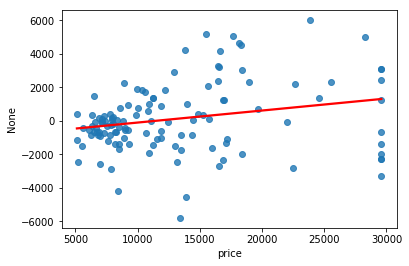

In [259]:
sns.regplot(orig_y,train_residuals,order =1,ci=None,line_kws={'color':'r'})

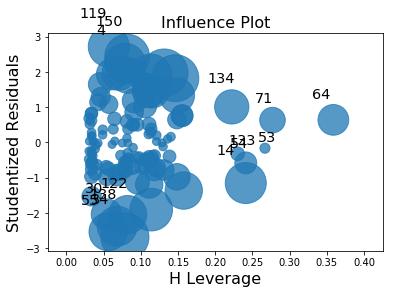

In [258]:
import statsmodels.api as sm
sm.graphics.influence_plot(res22,criterion ='cooks');

In [285]:
df_test['price_round'].to_csv('predictions_1.csv',index=False)

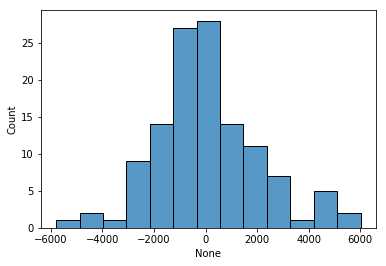

In [286]:
sns.histplot(train_residuals)  ##errors are almost normally distributed but there is heteroscedasticity


In [287]:
train_residuals.skew()

0.4429896549450311

## Random forest Regression

In [288]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               153 non-null    float64
 1   carheight               153 non-null    float64
 2   enginesize              153 non-null    float64
 3   boreratio               153 non-null    float64
 4   stroke                  153 non-null    float64
 5   compressionratio        153 non-null    float64
 6   peakrpm                 153 non-null    float64
 7   highwaympg              153 non-null    float64
 8   price                   153 non-null    float64
 9   symboling_-1            153 non-null    uint8  
 10  symboling_0             153 non-null    uint8  
 11  symboling_1             153 non-null    uint8  
 12  symboling_2             153 non-null    uint8  
 13  symboling_3             153 non-null    uint8  
 14  fueltype_gas            153 non-null    ui

In [289]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               52 non-null     float64
 1   carheight               52 non-null     float64
 2   enginesize              52 non-null     float64
 3   boreratio               52 non-null     float64
 4   stroke                  52 non-null     float64
 5   compressionratio        52 non-null     float64
 6   peakrpm                 52 non-null     float64
 7   highwaympg              52 non-null     float64
 8   price                   0 non-null      float64
 9   symboling_0             52 non-null     uint8  
 10  symboling_1             52 non-null     uint8  
 11  symboling_2             52 non-null     uint8  
 12  symboling_3             52 non-null     uint8  
 13  fueltype_gas            52 non-null     uint8  
 14  aspiration_turbo        52 non-null     uint

In [290]:
from sklearn.ensemble import RandomForestRegressor
rm = RandomForestRegressor(n_estimators = 100,random_state = 0)

##symboling category -1 and rear engine location are not in test data.. also, they are not significant variables as per linear model
##drop the variables symboling_-1 and engine_location rear

y=final_df[['price']]
X = final_df.drop(['price','enginelocation_rear','symboling_-1'],axis=1)

from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':range(1,11),'min_samples_leaf':range(1,10)}
gs = GridSearchCV(rm,param_grid,cv=5)
gs.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 10)})

In [292]:
gs.best_params_

{'max_depth': 8, 'min_samples_leaf': 2}

In [293]:
gs.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=2, random_state=0)

In [294]:
gs.cv_results_

{'mean_fit_time': array([0.24512277, 0.20236158, 0.20337439, 0.20065341, 0.20473051,
        0.1972877 , 0.20312548, 0.20374446, 0.19314651, 0.20911765,
        0.2102386 , 0.20818729, 0.2155138 , 0.21506724, 0.20366449,
        0.20255613, 0.20881958, 0.20770979, 0.21669526, 0.21576838,
        0.21270385, 0.2225071 , 0.21615586, 0.22389135, 0.21207604,
        0.22485242, 0.21619306, 0.28191943, 0.34704547, 0.28824816,
        0.28654814, 0.28689718, 0.3352241 , 0.40185971, 0.2505383 ,
        0.26316304, 0.27059536, 0.30732007, 0.32738314, 0.29533024,
        0.27088838, 0.34090781, 0.32710185, 0.22732315, 0.25677118,
        0.31987267, 0.28374152, 0.24406629, 0.24348054, 0.26890092,
        0.24600663, 0.30624871, 0.24706168, 0.2867661 , 0.2729475 ,
        0.28225827, 0.28386817, 0.27378335, 0.18254046, 0.30136437,
        0.29921947, 0.22179379, 0.19273276, 0.22826896, 0.21838288,
        0.24413404, 0.20202703, 0.28363967, 0.24648232, 0.20145974,
        0.20135956, 0.26258335,

In [307]:
rm_test_df = df_test.drop(['price_round','price'],axis=1)

In [308]:
rm_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               52 non-null     float64
 1   carheight               52 non-null     float64
 2   enginesize              52 non-null     float64
 3   boreratio               52 non-null     float64
 4   stroke                  52 non-null     float64
 5   compressionratio        52 non-null     float64
 6   peakrpm                 52 non-null     float64
 7   highwaympg              52 non-null     float64
 8   symboling_0             52 non-null     uint8  
 9   symboling_1             52 non-null     uint8  
 10  symboling_2             52 non-null     uint8  
 11  symboling_3             52 non-null     uint8  
 12  fueltype_gas            52 non-null     uint8  
 13  aspiration_turbo        52 non-null     uint8  
 14  doornumber_two          52 non-null     uint

In [309]:
gs.predict(rm_test_df)

array([ 9.56252814,  9.60412832,  8.96163448,  8.79282336,  9.59400013,
        9.52335167,  9.45866528,  9.01264721,  9.6405614 ,  9.34686762,
        9.47083071,  8.73448003,  9.71158302,  8.68641438,  9.45747683,
       10.16012005,  9.65689769, 10.27975996,  9.10554162, 10.29058418,
        9.15679902,  8.83284848,  8.96297021,  9.46734588,  9.83283928,
        8.71836456,  8.80046063,  9.282309  ,  9.0086733 ,  8.72980198,
        8.86760437,  9.54974566,  9.51016212, 10.16518021,  9.54443172,
        9.70334083,  9.67377948,  9.06204664,  9.6628341 ,  9.78809239,
        8.84126313,  9.07915225,  8.93412726,  9.81321479,  9.70116626,
        9.06823537,  9.26908366,  9.72526347,  9.78761318,  9.2993287 ,
        9.07792021,  8.90611509])

In [310]:
log_test_pred=gs.predict(rm_test_df)

In [311]:
test_pred = np.exp(log_test_pred)

In [312]:
test_pred

array([14221.75536309, 14825.86123301,  7798.09288098,  6586.80285393,
       14676.46003704, 13675.3697982 , 12818.76351552,  8206.21612407,
       15375.9734286 , 11462.86106932, 12975.66183046,  6213.50254839,
       16507.71323741,  5921.91041955, 12803.53816316, 25851.4002249 ,
       15629.22263348, 29136.87872024,  9005.05732712, 29453.97571472,
        9478.66742059,  6855.78758817,  7808.5159944 , 12930.52249335,
       18635.79149802,  6114.17154936,  6637.30066969, 10746.21626027,
        8173.6700982 ,  6184.50331141,  7098.25580804, 14041.12293629,
       13496.18208285, 25982.54406502, 13966.70722532, 16372.21267066,
       15895.31166944,  8621.77831312, 15722.28004012, 17820.2795113 ,
        6913.72003235,  8770.52761778,  7586.51234182, 18273.63857991,
       16336.64879819,  8675.30162302, 10605.02957523, 16735.09798788,
       17811.7419057 , 10930.67899697,  8759.72870814,  7376.94658752])

In [314]:
df_test['Predictions']=test_pred
df_test['Predictions'].to_csv("rf_predictions.csv",index=False)